# Loan Default Prediction: Exploratory Data Analysis

Welcome to this notebook on loan default prediction through Exploratory Data Analysis (EDA). In this analysis, we aim to uncover patterns and insights in loan application data to understand the factors influencing loan default.

## Objective:
The primary objective of this analysis is to identify key features and trends that indicate whether a client may have difficulty repaying their loan installments. By leveraging EDA techniques, we aim to provide actionable insights to financial institutions for optimizing lending strategies and risk assessment processes.

## Dataset:
The dataset used in this analysis consists of three main files:
1. 'application_data.csv': Contains client information at the time of loan application.
2. 'previous_application.csv': Provides data on the client's previous loan applications.
3. 'columns_description.csv': A data dictionary describing the variables used in the datasets.

## Methodology:
1. Data Cleaning and Preprocessing: We will begin by cleaning the data and handling missing values, outliers, and unnecessary columns.
2. Exploratory Data Analysis (EDA): Through visualization and statistical analysis, we will explore relationships between variables and identify patterns indicative of loan default.
3. Insights and Recommendations: Based on our analysis, we will provide insights and recommendations for lending institutions to optimize their loan approval processes.

## Let's Get Started!
Without further ado, let's dive into the data and uncover valuable insights that can drive informed decision-making in the lending domain.


## IMPORTING LIBRARIES

In [1]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#setting display rows and columns
pd.set_option("display.max_columns",500) #Setting column display limit
pd.set_option("display.max_rows", 500) #Setting rows display limit

## 1.LOADING DATASETS

In [4]:
#df1=Application data
#loading application data
df1= pd.read_csv('application_data.csv')
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#df2=previous_application data
#loading previous_application data
df2= pd.read_csv('previous_application.csv')
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#printing rows and columns
print('df1:', df1.shape)
print('df2:', df2.shape)

df1: (307511, 122)
df2: (1670214, 37)


### First focusing on Application_data 

In [7]:
#summary of all the numeric columns in the dataset
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Insight: 
The numeric columns inthe dataframe values tells us we need to process and clean data as most columns values, and also drop unnecessary columns

In [8]:
#to figure dtypes in all columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
#Here, by giving verbose = True, it will give all the information about all the columns. 
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Insight: 
There are dtypes: float64(65), int64(41), object(16)

In [10]:
#To count the dypes in each categories
df1.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

## 2. CHECKING FOR NULL VALUES

In [11]:
#checking null values
df1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
#assigning and sorting all the null values by percentage
isnull = df1.isnull().mean()*100
isnull.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Insight:
As most columns do not contain hence obtaining columns which have null values

In [13]:
isnull.sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [14]:
#Columns with high missing percentage >=35%
isnull=isnull[isnull>=35]
isnull

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [15]:
len(isnull)

49

## 3.FIXING NULL values

#### Removing columns with more than 35% missing values as they might cause errors during analysis and visalization

In [16]:
label = list(isnull.index.values) #Making list of column names having null values greater than 35%
df1.drop(labels = label,axis=1,inplace = True) #Droping columns
df1.shape

(307511, 73)

In [17]:
# Checking the columns after removing high missing values(>=35%)
df1.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Insight:
There are still unnecessary columns, which we can drop

1.There are columns which Flag if client's permanent/current address  match contact/work/ address or not, which doesn't seem necessary here, hence we can drop those columns

2.All Flag_document columns, as we don't have ideas about which documents are necessary and hence we can drop them.
Flag_contact numbers also can be dropped.

3.Ext_Source_1 & 2 doesn't give us any information , hence we can drop them as well.

4.Any column with normalized value can also be dropped if found uncessary.

In [18]:
# Drop unnecessary columns from the dataset

Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','EXT_SOURCE_2','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY',
         'REG_CITY_NOT_LIVE_CITY','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','REGION_POPULATION_RELATIVE']

df1.drop(labels=Drop_col,axis=1,inplace=True)

In [19]:
#checking shape after dropping columns
df1.shape

(307511, 35)

In [20]:
# Checking the columns with null values after dropping unncessary columns
isnull = df1.isnull().mean()*100
isnull.sort_values(ascending=False).head(15) 

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
dtype: float64

### Insight:
15 columns still have null values, but as its less than =<13% we need to check before taking any futher steps

Dropping more columns, to save time from uncessary analysis

1.like How many observation of client's social surroundings with observable n DPD (days past due) default , all these columns can be dropped.

2.Similarly Number of enquiries to Credit Bureau about the client certain time period before application can be dropped for time-being.

In [21]:
# Drop unnecessary columns from the dataset
Drop_col = ['AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_YEAR',
            'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
            'DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']
df1.drop(labels=Drop_col,axis=1,inplace=True)

In [22]:
#checking shape after dropping columns
df1.shape

(307511, 25)

In [23]:
# Checking the columns with null values after dropping unncessary columns
isnull = df1.isnull().mean()*100
isnull.sort_values(ascending=False).head() 

OCCUPATION_TYPE    31.345545
NAME_TYPE_SUITE     0.420148
AMT_GOODS_PRICE     0.090403
AMT_ANNUITY         0.003902
CNT_FAM_MEMBERS     0.000650
dtype: float64

### Insight:

if a column is a categorical column need to check, which category you can use to fill the nulls.whether mean or median can be imputed or not.

Others columns may be imputing with 0.

You need to do this task for some variables and not for all.

Especially for columns:'OCCUPATION_TYPE','NAME_TYPE_SUITE','AMT_GOODS_PRICE','AMT_ANNUITY'

In [24]:
df1.OCCUPATION_TYPE.head(10)

0       Laborers
1     Core staff
2       Laborers
3       Laborers
4     Core staff
5       Laborers
6    Accountants
7       Managers
8            NaN
9       Laborers
Name: OCCUPATION_TYPE, dtype: object

In [25]:
df1.NAME_TYPE_SUITE.head(10)

0      Unaccompanied
1             Family
2      Unaccompanied
3      Unaccompanied
4      Unaccompanied
5    Spouse, partner
6      Unaccompanied
7      Unaccompanied
8           Children
9      Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [26]:
df1.AMT_GOODS_PRICE.head(10)

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
5     454500.0
6    1395000.0
7    1530000.0
8     913500.0
9     405000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [27]:
df1.AMT_ANNUITY.head(10)

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
5    27517.5
6    41301.0
7    42075.0
8    33826.5
9    20250.0
Name: AMT_ANNUITY, dtype: float64

### Insight
'OCCUPATION_TYPE'&'NAME_TYPE_SUITE' have categorical variables

AMT_GOODS_PRICE'&'AMT_ANNUITY have numerical variable

#### OCCUPATION_TYPE

In [28]:
#number of missing values in "OCCUPATION_TYPE" column
df1.OCCUPATION_TYPE.isnull().sum()

96391

In [29]:
#Percentage of missing values in "OCCUPATION_TYPE" column
100*(96391/307511)

31.345545362604916

In [30]:
#percentage of each OCCUPATION TYPES  
df1.OCCUPATION_TYPE .value_counts(normalize=True)

OCCUPATION_TYPE
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: proportion, dtype: float64

Laborers are higher in percentage, we can check with the function mode

In [31]:
#mode of OCCUPATION_TYPE 
occupation_mode=df1.OCCUPATION_TYPE.mode()[0]
occupation_mode

'Laborers'

### Insight:
'OCCUPATION_TYPE' is a categorical variable, has 31.3% of missing values. 

we can impute the missing values with the most popular category(mode) which is "Laborers"

In [32]:
#filling missing values, i.e NaN
df1.OCCUPATION_TYPE.fillna(df1.OCCUPATION_TYPE.mode()[0],inplace = True)

In [33]:
#check for NAN values
df1.OCCUPATION_TYPE.isnull().sum()

0

#### 'NAME_TYPE_SUITE'

In [34]:
#number of missing values in "NAME_TYPE_SUITE" column
df1.NAME_TYPE_SUITE.isnull().sum()

1292

In [35]:
#Percentage of missing values in "NAME_TYPE_SUITE" column
100*(1292/307511)

0.42014757195677555

In [36]:
#percentage of each NAME_TYPE_SUITE  
df1.NAME_TYPE_SUITE.value_counts(normalize=True)

NAME_TYPE_SUITE
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: proportion, dtype: float64

In [37]:
#mode of NAME_TYPE_SUITE 
suite_mode=df1.NAME_TYPE_SUITE.mode()[0]
suite_mode

'Unaccompanied'

### Insight:
'NAME_TYPE_SUITE' is a categorical variable, has 0.81% of missing values.

we can impute the missing values with the most popular category(mode) which is "Unaccompanied"

In [38]:
#filling missing values, i.e NaN
df1.NAME_TYPE_SUITE.fillna(df1.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

In [39]:
#check for NAN values
df1.NAME_TYPE_SUITE.isnull().sum()

0

#### AMT_GOODS_PRICE

In [40]:
#Missing values in "AMT_GOODS_PRICE" column
df1.AMT_GOODS_PRICE.isnull().sum()

278

In [41]:
#Percentage of missing values in "AMT_GOODS_PRICE" column
float(100*(278/307511))

0.09040327012692229

In [42]:
df1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

### Insight
AMT_GOODS_PRICE has less percentage of missing values.These missing values can be imputed with median

In [43]:
#filling missing values with median
df1.AMT_GOODS_PRICE.fillna(df1.AMT_GOODS_PRICE.median() , inplace = True)

#### AMT_ANNUITY

In [44]:
#Missing values in "AMT_ANNUITY" column
df1.AMT_ANNUITY.isnull().sum()

12

In [45]:
#Percentage of missing values in "AMT_ANNUITY" column
float(100*(12/307511))

0.003902299429939092

In [46]:
df1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

### Insight
The difference between max and min is quite severe. Also has less percentage of missing values.These missing values can be imputed with median

In [47]:
#filling missing values with median
df1.AMT_ANNUITY.fillna(df1.AMT_ANNUITY.median() , inplace = True)

#### CNT_FAM_MEMBERS

In [48]:
df1.CNT_FAM_MEMBERS.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: bool

In [49]:
#dropping two values
df1 = df1[df1.CNT_FAM_MEMBERS.notna()]

In [50]:
#checking for null values
df1.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
ORGANIZATION_TYPE             0
dtype: int64

### Insight:
Dropping more columns



In [51]:
#checking shape after an initial cleaning of dataset
df1.shape

(307509, 25)

#### Columns considered and there respective meaning

1.SK_ID_CURR:ID of loan in our sample      

2.TARGET:Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)  

3.NAME_CONTRACT_TYPE:Identification if loan is cash or revolving

4.CODE_GENDER:Gender of the client

5.FLAG_OWN_CAR:Flag if the client owns a car

6.FLAG_OWN_REALTY:Flag if client owns a house or flat

7.CNT_CHILDREN:Number of children the client has

8.AMT_INCOME_TOTAL:Income of the client

9.AMT_CREDIT:Credit amount of the loan

10.AMT_ANNUITY:Loan annuity

11.AMT_GOODS_PRICE:For consumer loans it is the price of the goods for which the loan is given

12.NAME_TYPE_SUITE:Who was accompanying client when he was applying for the loan

13.NAME_INCOME_TYPE:Clients income type (businessman, working, maternity leave,…)

14.NAME_EDUCATION_TYPE:Level of highest education the client achieved

15.NAME_FAMILY_STATUS:Family status of the client

16.NAME_HOUSING_TYPE:What is the housing situation of the client (renting, living with parents, ...)

17.DAYS_BIRTH:Client's age in days at the time of application

18.DAYS_EMPLOYED:How many days before the application the person started current employment

19.DAYS_REGISTRATION:How many days before the application did client change his registration

20.DAYS_ID_PUBLISH:How many days before the application did client change the identity document with which he applied for the loan

21.OCCUPATION_TYPE:What kind of occupation does the client have

22.CNT_FAM_MEMBERS:How many family members does client have 

23.WEEKDAY_APPR_PROCESS_START:On which day of the week did the client apply for the loan 

24.HOUR_APPR_PROCESS_START:Approximately at what hour did the client apply for the loan  

25.ORGANIZATION_TYPE:Type of organization where client works

In [52]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.0,-2437,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,Religion


### Insight
Most columns values are negative hence need to change them to positive value

In [53]:
#changing negative values to positive
df1.DAYS_BIRTH = abs(df1.DAYS_BIRTH)  #date_birth contains negative values and we have to change negative ages that to positive ages
df1.DAYS_EMPLOYED = abs(df1.DAYS_EMPLOYED) #DAYS_EMPLOYED contains negative values and we have to change negative days that to positive days
df1.DAYS_REGISTRATION = abs(df1.DAYS_REGISTRATION) #DAYS_REGISTRATION contains negative values and we have to change negative days that to positive days
df1.DAYS_ID_PUBLISH = abs(df1.DAYS_ID_PUBLISH) #changing negative days to positive 


## 4. Working on  individual columns before heading for further steps

In [54]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,Religion


Checking columns with categorical and continous , with the ideology only for this dataset

1.If the number of unique values in a columns <=100: Categorical column

2.If the number of unique values in a columns> 100: Continuous column

In [55]:
#unique values is a column
df1.nunique().sort_values()

TARGET                             2
NAME_CONTRACT_TYPE                 2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CODE_GENDER                        3
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 5
NAME_HOUSING_TYPE                  6
WEEKDAY_APPR_PROCESS_START         7
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
HOUR_APPR_PROCESS_START           24
ORGANIZATION_TYPE                 58
AMT_GOODS_PRICE                 1002
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
DAYS_ID_PUBLISH                 6168
DAYS_EMPLOYED                  12574
AMT_ANNUITY                    13672
DAYS_REGISTRATION              15688
DAYS_BIRTH                     17460
SK_ID_CURR                    307509
dtype: int64

Now it is clear that which are Continuous and Categorical variables. 

Now we can consider some continuous and categorical variables and change the datatypes if needed

In [56]:
df1.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
ORGANIZATION_TYPE              object
dtype: object

All columns looks like have appropiate dtypes,so for currently not changing any dtypes

In [57]:
#Checking few more columns before further analysis 

In [58]:
#checking other columns before analysis
df1.CODE_GENDER.value_counts(dropna=False)

CODE_GENDER
F      202447
M      105058
XNA         4
Name: count, dtype: int64

Female(F) is having the majority and only 4 rows are having XNA values. we can impute 'XNA' with Gender 'F'.

In [59]:
## replace XNA with F
df1.loc[df1['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df1.CODE_GENDER.value_counts()

CODE_GENDER
F    202451
M    105058
Name: count, dtype: int64

In [60]:
df1.ORGANIZATION_TYPE.value_counts(dropna=False).head(10)

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Name: count, dtype: int64

In [61]:
df1.ORGANIZATION_TYPE.describe()

count                     307509
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [62]:
(55374/307511)*100

18.00716071945394

There are 55374 rows with XNA value which is 18% of the total count. So we can discard them.

In [63]:
#dropping XNA from organization_type
df1.drop(df1[(df1['ORGANIZATION_TYPE'] == 'XNA')].index, inplace=True)

In [64]:
df1.ORGANIZATION_TYPE.value_counts(dropna=False).head(10)

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Name: count, dtype: int64

## 5. Working on Outliers

#### 1.AMT_INCOME_TOTAL

In [65]:
df1.AMT_INCOME_TOTAL.describe()

count    2.521350e+05
mean     1.759129e+05
std      2.588520e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

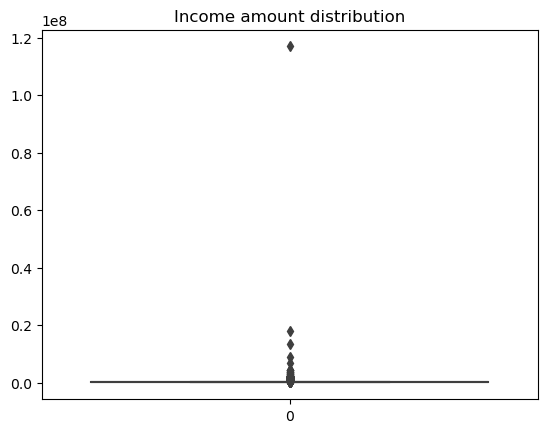

In [66]:
sns.boxplot(df1.AMT_INCOME_TOTAL)
plt.title('Income amount distribution')
plt.show()

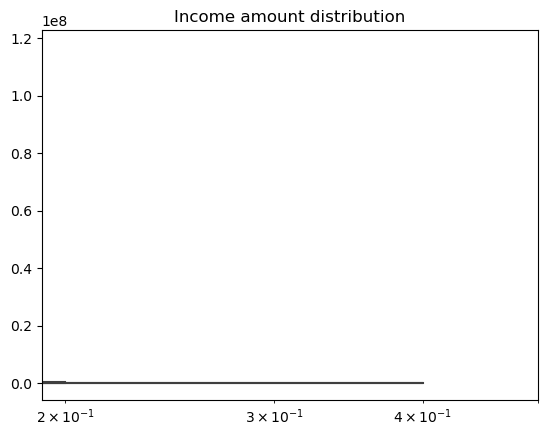

In [67]:
#adding log scale for better scale
sns.boxplot(df1.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Income amount distribution')
plt.show()

In [68]:
#checking quantile range for median , max , and quantile ranges
df1.AMT_INCOME_TOTAL.quantile([0.5,0.75,0.9,0.95,0.99])

0.50    157500.0
0.75    211500.0
0.90    270000.0
0.95    355122.9
0.99    517500.0
Name: AMT_INCOME_TOTAL, dtype: float64

### Insight

There are outliers present in this columns, might be due to the total income vary from person to person. The quantile ranges states that there are lot of difference between even 99th , 95th quantiles hence cause lot of outliers in the data set.

As the median value and max value have huge difference.

We can cap the outliers here.

####  2.AMT_CREDIT

In [69]:
df1.AMT_CREDIT.describe()

count    2.521350e+05
mean     6.113983e+05
std      4.065288e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

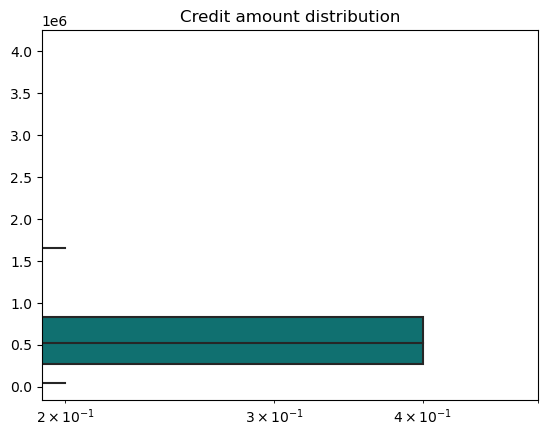

In [70]:
#adding log scale for better scale
sns.boxplot(df1.AMT_CREDIT, color='teal')
plt.xscale('log')
plt.title('Credit amount distribution')
plt.show()

In [71]:
#checking quantile range for median , max , and quantile ranges
df1.AMT_CREDIT.quantile([0.5,0.75,0.9,0.95,0.99])

0.50     521280.0
0.75     829224.0
0.90    1170000.0
0.95    1350000.0
0.99    1886850.0
Name: AMT_CREDIT, dtype: float64

### Insight
AMT_CREDIT columns has outliers, there is huge difference between 99th percentile and median which indicates the reason for outliers.

These outliers may be due to amount credited varied from customer to customers.

#### 3.AMT_ANNUITY


In [72]:
df1.AMT_ANNUITY.describe()

count    252135.000000
mean      27812.157451
std       14647.477322
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

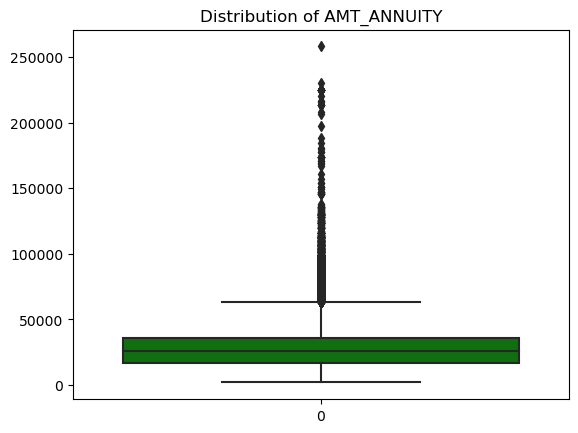

In [73]:
sns.boxplot(df1.AMT_ANNUITY, color ='Green')
plt.title('Distribution of AMT_ANNUITY')
plt.show()

### Insight
AMT_ANNUITY has outliers, but the due to not much difference in mean and median, we can either ignore or impute the outliers with median

#### 4. AMT_GOODS_PRICE

In [74]:
df1.AMT_GOODS_PRICE.describe()

count    2.521350e+05
mean     5.493055e+05
std      3.730938e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.930000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

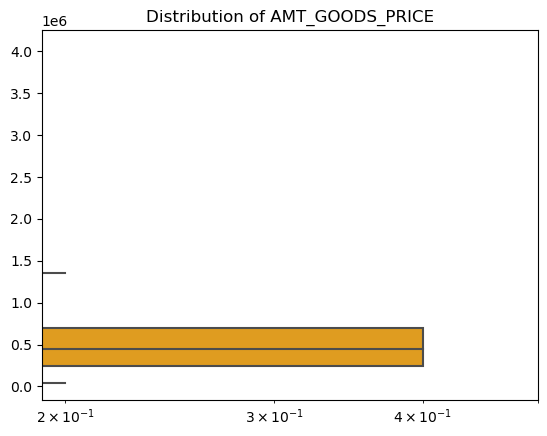

In [75]:
sns.boxplot(df1.AMT_GOODS_PRICE, color ='Orange')
plt.title('Distribution of AMT_GOODS_PRICE')
plt.xscale('log')
plt.show()

### Insight
AMT_GOODS_PRICE values lies in certain range,also, has less outliers compartively.

As this column values indicates consumer loans it is the price of the goods for which the loan is given, hence indicating that the loan varied from customer to customer.


#### 5. DAYS_BIRTH

In [76]:
df1.DAYS_BIRTH.describe()

count    252135.000000
mean      14769.150221
std        3662.583240
min        7489.000000
25%       11775.000000
50%       14573.000000
75%       17563.000000
max       25200.000000
Name: DAYS_BIRTH, dtype: float64

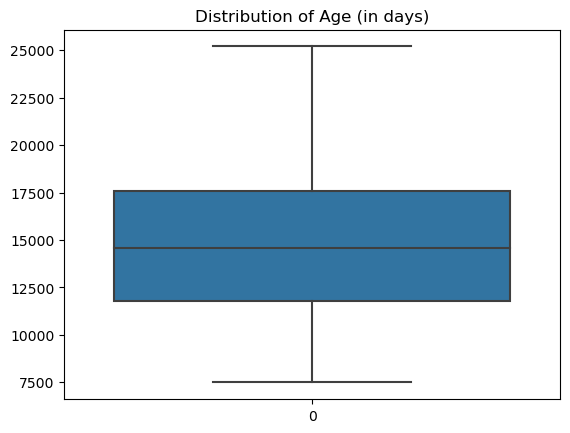

In [77]:
sns.boxplot(df1.DAYS_BIRTH)
plt.title('Distribution of Age (in days)')
plt.show()

### Insight
DAYS_BIRTH column -the mean and median doesn't have much difference, also there are no outliers present

#### 6. DAYS_EMPLOYED

In [78]:
df1.DAYS_EMPLOYED.describe()

count    252135.000000
mean       2384.182712
std        2338.364239
min           0.000000
25%         767.000000
50%        1648.000000
75%        3175.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

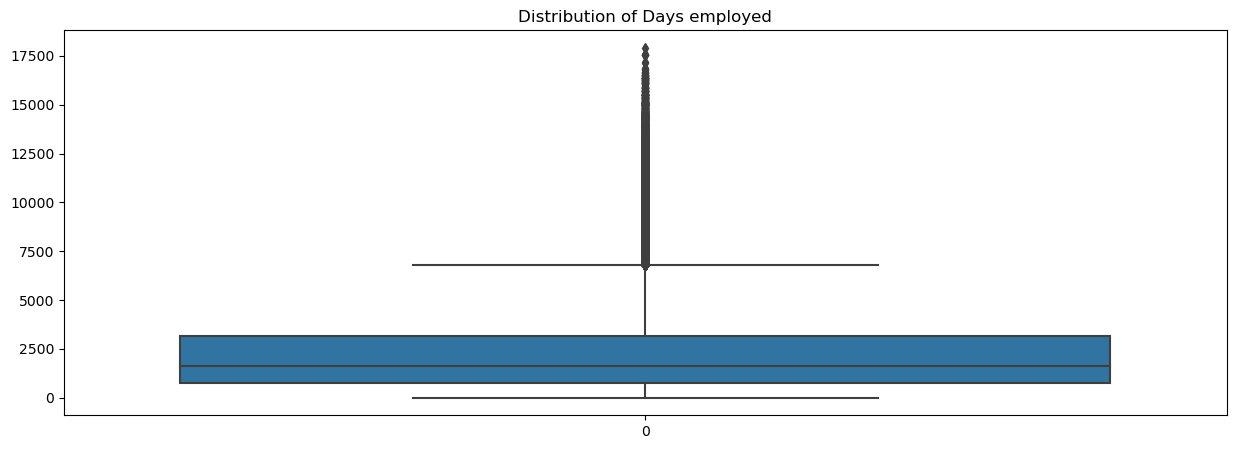

In [79]:
plt.figure(figsize=(15,5))
sns.boxplot(df1.DAYS_EMPLOYED)
plt.title('Distribution of Days employed')
plt.show()

  ### Insight
  There are very few outliers, The values differes from person to person.

## 6. Binning Variables
Checking if we need to bin any variable , especially continous variables

In [80]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,Religion


####  binning 3 columns 

1.AMT_INCOME_TOTAL

2.AMT_CREDIT

3.DAYS_BIRTH


In [81]:
# Creating bins for income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

df1['AMT_INCOME_RANGE'] = pd.cut(df1.AMT_INCOME_TOTAL,bins,labels=slot)

In [82]:
df1.AMT_INCOME_RANGE.value_counts()

AMT_INCOME_RANGE
Low       173529
Medium     71148
High        7458
Name: count, dtype: int64

In [83]:
#Creating bins for Credit amount

bins = [0,400000,800000,1000000000]
slots = ['Low','Medium','High']

df1['AMT_CREDIT_RANGE'] = pd.cut(df1.AMT_CREDIT,bins=bins,labels=slots)

In [84]:
df1.AMT_CREDIT_RANGE.value_counts()

AMT_CREDIT_RANGE
Low       92718
Medium    90161
High      69256
Name: count, dtype: int64

In [85]:
# Creating bins for days_birth
#7300=20,10950=30,14600=40,18250=50,21900=60,25550=70
bins = [0,7300,10950,14600,18250,21900,25550]
slot = ['0-20','20-30','30-40','40-50','50-60','60-70']

df1['DAYS_BIRTH_RANGE'] = pd.cut(df1.DAYS_BIRTH,bins,labels=slot)

In [86]:
df1.DAYS_BIRTH_RANGE.value_counts()

DAYS_BIRTH_RANGE
30-40    81804
40-50    74718
20-30    44885
50-60    44727
60-70     6001
0-20         0
Name: count, dtype: int64

In [87]:
#Checking bin columns 
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School,Medium,High,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,Government,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,Religion,Low,Medium,50-60


## 6.Analysis

### 1. Checking for Imbalance Percentage

In [88]:
#data imbalance
df1.TARGET.value_counts() 

TARGET
0    230300
1     21835
Name: count, dtype: int64

In [89]:
df1.TARGET.value_counts(normalize=True)*100 

TARGET
0    91.339957
1     8.660043
Name: proportion, dtype: float64

### Insight
TARGET column has 8.65% of 1's which means 8% clients have payment difficulties and 91.92% are having no difficulties.

So known defaulters are 11.5 times more.

In [90]:
# Dividing the dataset into two different dataset of 1. target=1(client with payment difficulties) and 2. target=0(all other)
TARGET_1 = df1[df1.TARGET ==1]
TARGET_0 = df1[df1.TARGET ==0]

In [91]:
TARGET_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School,Medium,High,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,Government,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,Religion,Low,Medium,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,16941,1588,4970.0,477,Laborers,2.0,WEDNESDAY,16,Other,Low,Medium,40-50


In [92]:
TARGET_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3,Medium,Medium,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,6573.0,1827,Cooking staff,1.0,MONDAY,9,Business Entity Type 3,Low,High,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,1182.0,1029,Laborers,2.0,TUESDAY,9,Business Entity Type 3,Medium,High,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,45.0,4409,Sales staff,2.0,THURSDAY,11,Self-employed,Low,Low,30-40
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Family,Commercial associate,Incomplete higher,Single / not married,With parents,10199,2015,4802.0,1038,Laborers,1.0,SUNDAY,13,Industry: type 4,Medium,High,20-30


In [93]:
#printing rows and columns
print('TARGET_1:', TARGET_1.shape)
print('TARGET_0:', TARGET_0.shape)

TARGET_1: (21835, 28)
TARGET_0: (230300, 28)


### 2. Univariate Analysis

#### Numerical Univariate Analysis
1.Amount credit Range

2.Age Range

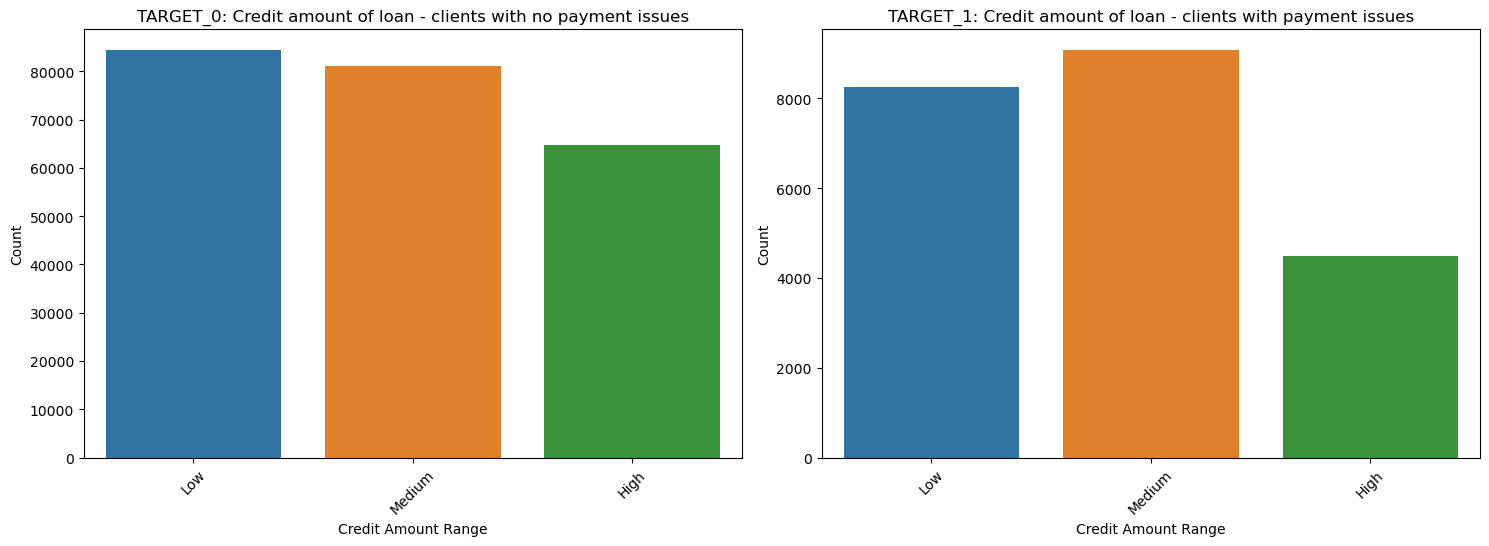

In [106]:
# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Plot for clients with no payment issues (TARGET_0)
plt.subplot(2, 2, 1)
plt.title('TARGET_0: Credit amount of loan - clients with no payment issues')
sns.countplot(x='AMT_CREDIT_RANGE', data=TARGET_0)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Credit Amount Range')
plt.ylabel('Count')

# Plot for clients with payment issues (TARGET_1)
plt.subplot(2, 2, 2)
plt.title('TARGET_1: Credit amount of loan - clients with payment issues')
sns.countplot(x='AMT_CREDIT_RANGE', data=TARGET_1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Credit Amount Range')
plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Insight
Clients with low and high credit are most likely to make payments comparatively to clients who fall in medium range group.

whereas the clients in the category with payment issues have almost the same response irrespective of credit amount.

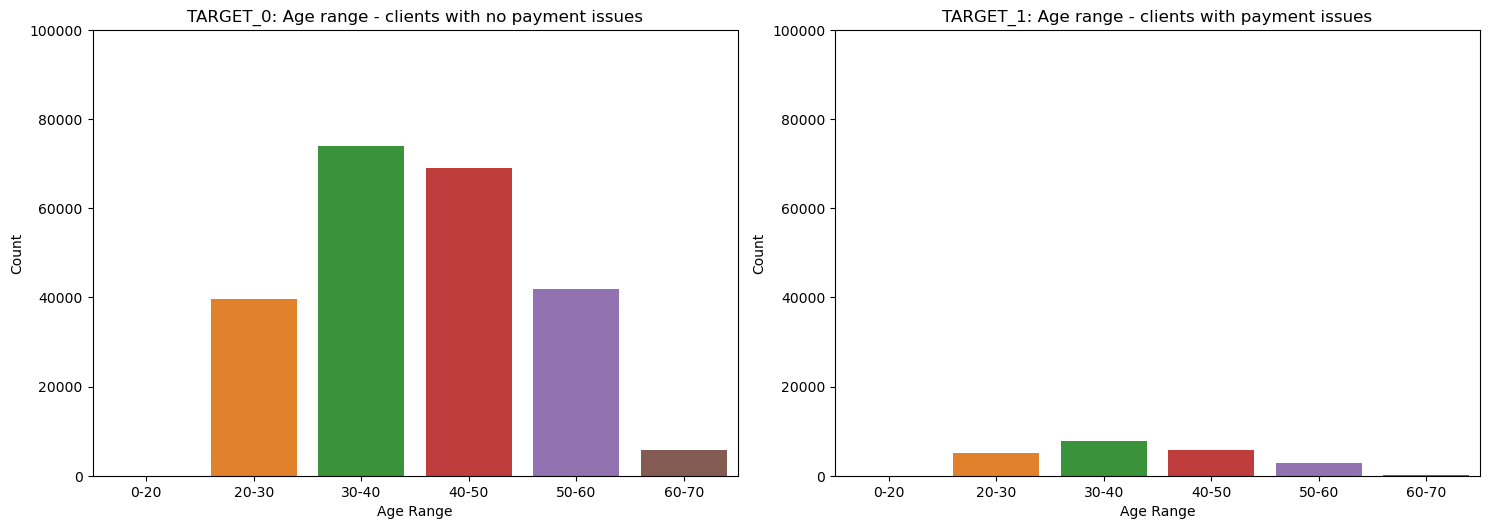

In [109]:
# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Plot for clients with no payment issues (TARGET_0)
plt.subplot(2, 2, 1)
plt.title('TARGET_0: Age range - clients with no payment issues')
sns.countplot(x='DAYS_BIRTH_RANGE', data=TARGET_0)
plt.ylim(0, 100000)  # Set y-axis limit for better comparison
plt.xlabel('Age Range')
plt.ylabel('Count')

# Plot for clients with payment issues (TARGET_1)
plt.subplot(2, 2, 2)
plt.title('TARGET_1: Age range - clients with payment issues')
sns.countplot(x='DAYS_BIRTH_RANGE', data=TARGET_1)
plt.ylim(0, 100000)  # Set y-axis limit for better comparison
plt.xlabel('Age Range')
plt.ylabel('Count')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Insight
Clients with age range 30-50 are most likely to make payments on time comparatively to clients who fall in other age groups.

whereas the clients age range 30-50 with payment issues also might be the one who doesn't make payment on time.

With this 20-60 age can be considered the age group to lend loans, but banks should also take other categories also in consideration.

#### Categorical Univariate Analysis

1.Name Income type

2.Ocuupation type

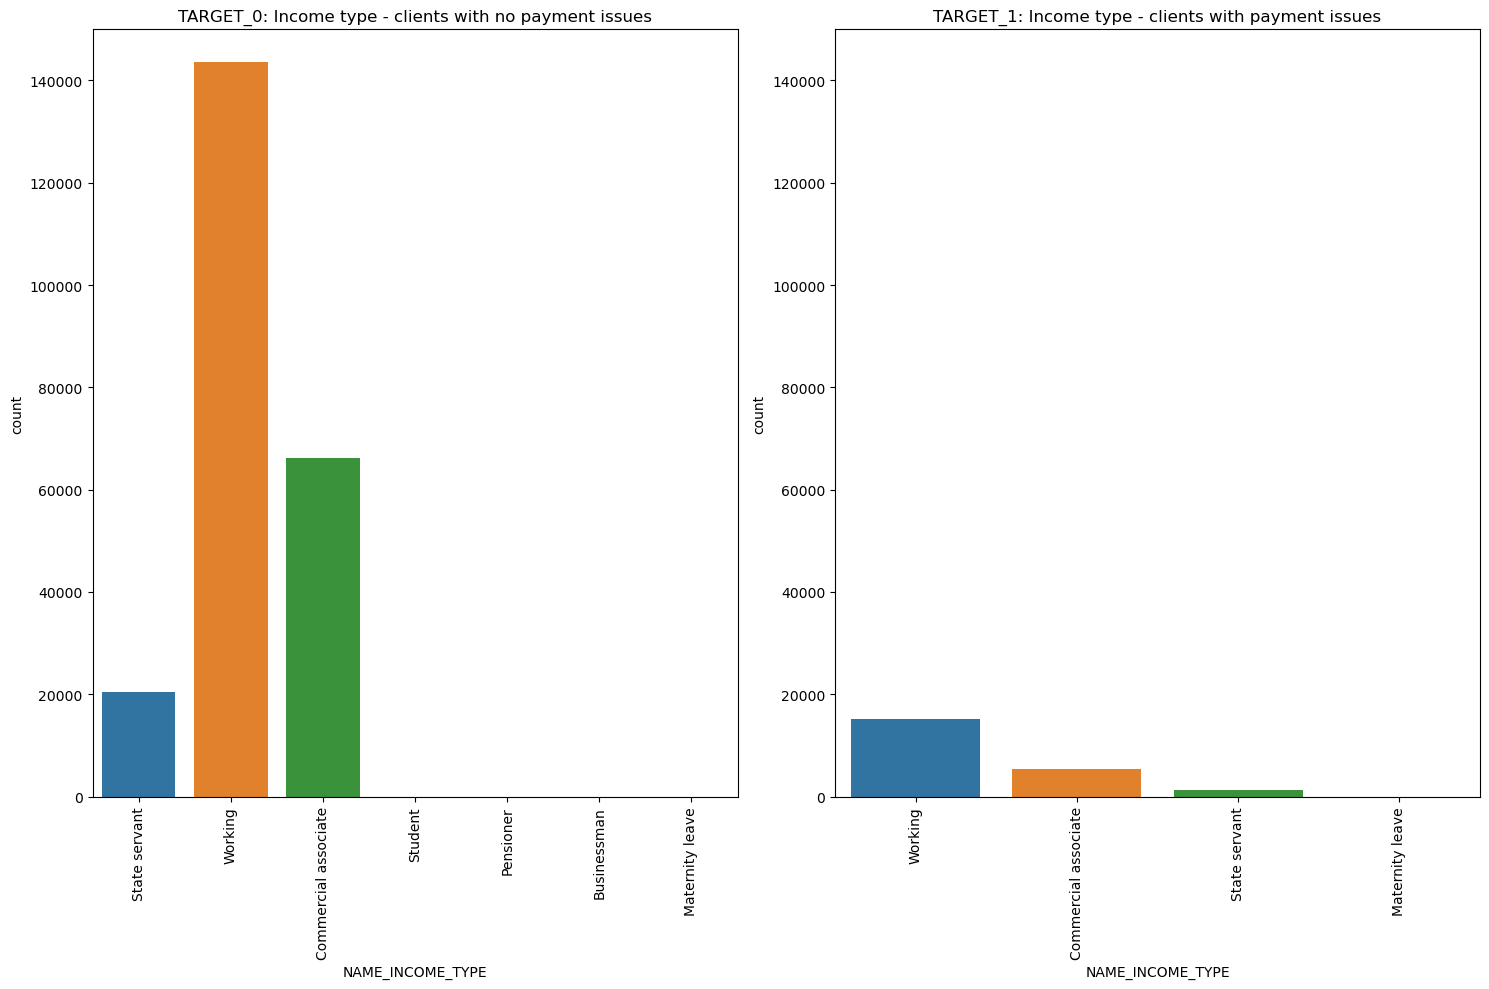

In [111]:
# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Plot for clients with no payment issues (TARGET_0)
plt.subplot(1, 2, 1)
sns.countplot(x='NAME_INCOME_TYPE', data=TARGET_0)
plt.title('TARGET_0: Income type - clients with no payment issues')
plt.ylim(0, 150000)
plt.xticks(rotation=90)

# Plot for clients with payment issues (TARGET_1)
plt.subplot(1, 2, 2)
sns.countplot(x='NAME_INCOME_TYPE', data=TARGET_1)
plt.title('TARGET_1: Income type - clients with payment issues')
plt.ylim(0, 150000)
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Insight

Working and commericial associate professional make payments on time comparetively to clients who fall in other categories.



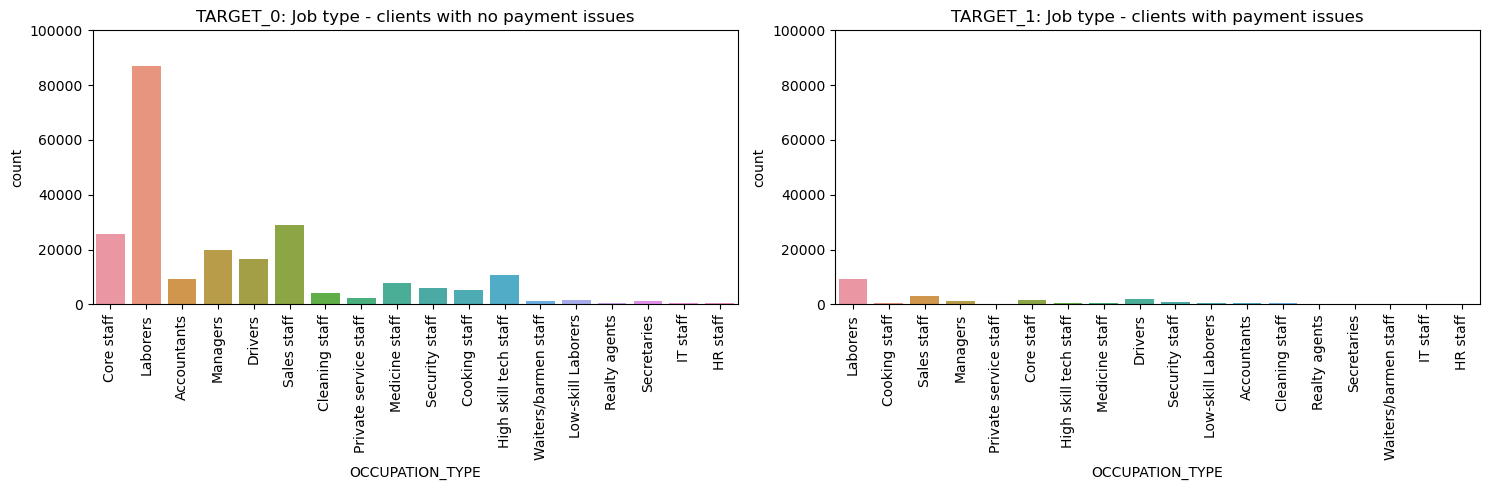

In [112]:
# Set up the figure and axes
plt.figure(figsize=(15, 5))

# Plot for clients with no payment issues (TARGET_0)
plt.subplot(1, 2, 1)
sns.countplot(x='OCCUPATION_TYPE', data=TARGET_0)
plt.title('TARGET_0: Job type - clients with no payment issues')
plt.ylim(0, 100000)
plt.xticks(rotation=90)

# Plot for clients with payment issues (TARGET_1)
plt.subplot(1, 2, 2)
sns.countplot(x='OCCUPATION_TYPE', data=TARGET_1)
plt.title('TARGET_1: Job type - clients with payment issues')
plt.ylim(0, 100000)
plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### Insight

Labourers make payments on time comparetively to clients who fall in other categories.Whereas HR staff are complete opposite and delay in payments


### Categorical  analysis

In [114]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3,Medium,Medium,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School,Medium,High,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,Government,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,Religion,Low,Medium,50-60


In [115]:
#mutiple categorical columns_1
Columns_1 = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE']
list(enumerate(Columns_1))

[(0, 'CODE_GENDER'),
 (1, 'NAME_INCOME_TYPE'),
 (2, 'CNT_CHILDREN'),
 (3, 'NAME_EDUCATION_TYPE')]

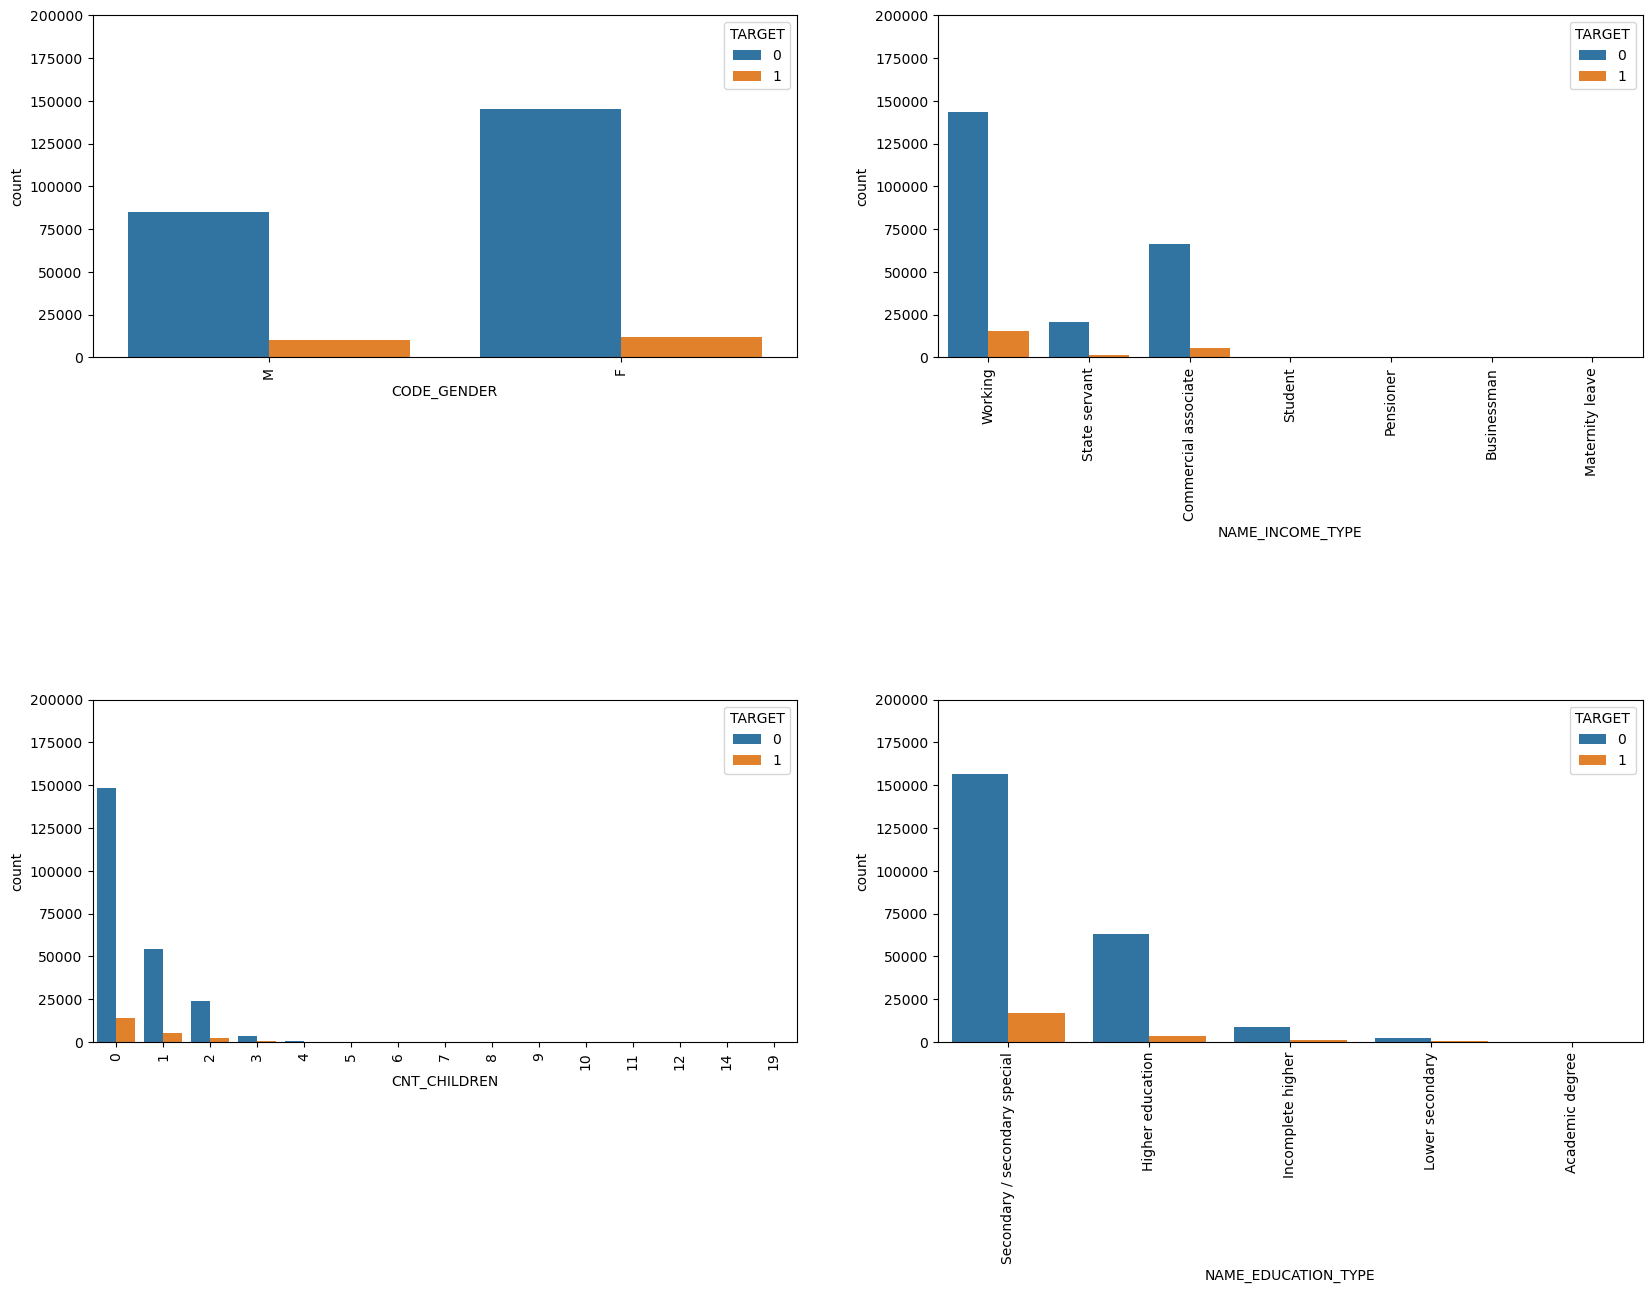

In [116]:
plt.figure(figsize = (20, 40))
plt.subplots_adjust(hspace=1)

for i in enumerate(Columns_1):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df1)
    plt.xticks(rotation = 90)
    plt.ylim(0,200000)


In [117]:
#mutiple categorical columns_2
Columns_2 =['NAME_TYPE_SUITE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
list(enumerate(Columns_2))

[(0, 'NAME_TYPE_SUITE'),
 (1, 'NAME_FAMILY_STATUS'),
 (2, 'NAME_HOUSING_TYPE'),
 (3, 'OCCUPATION_TYPE')]

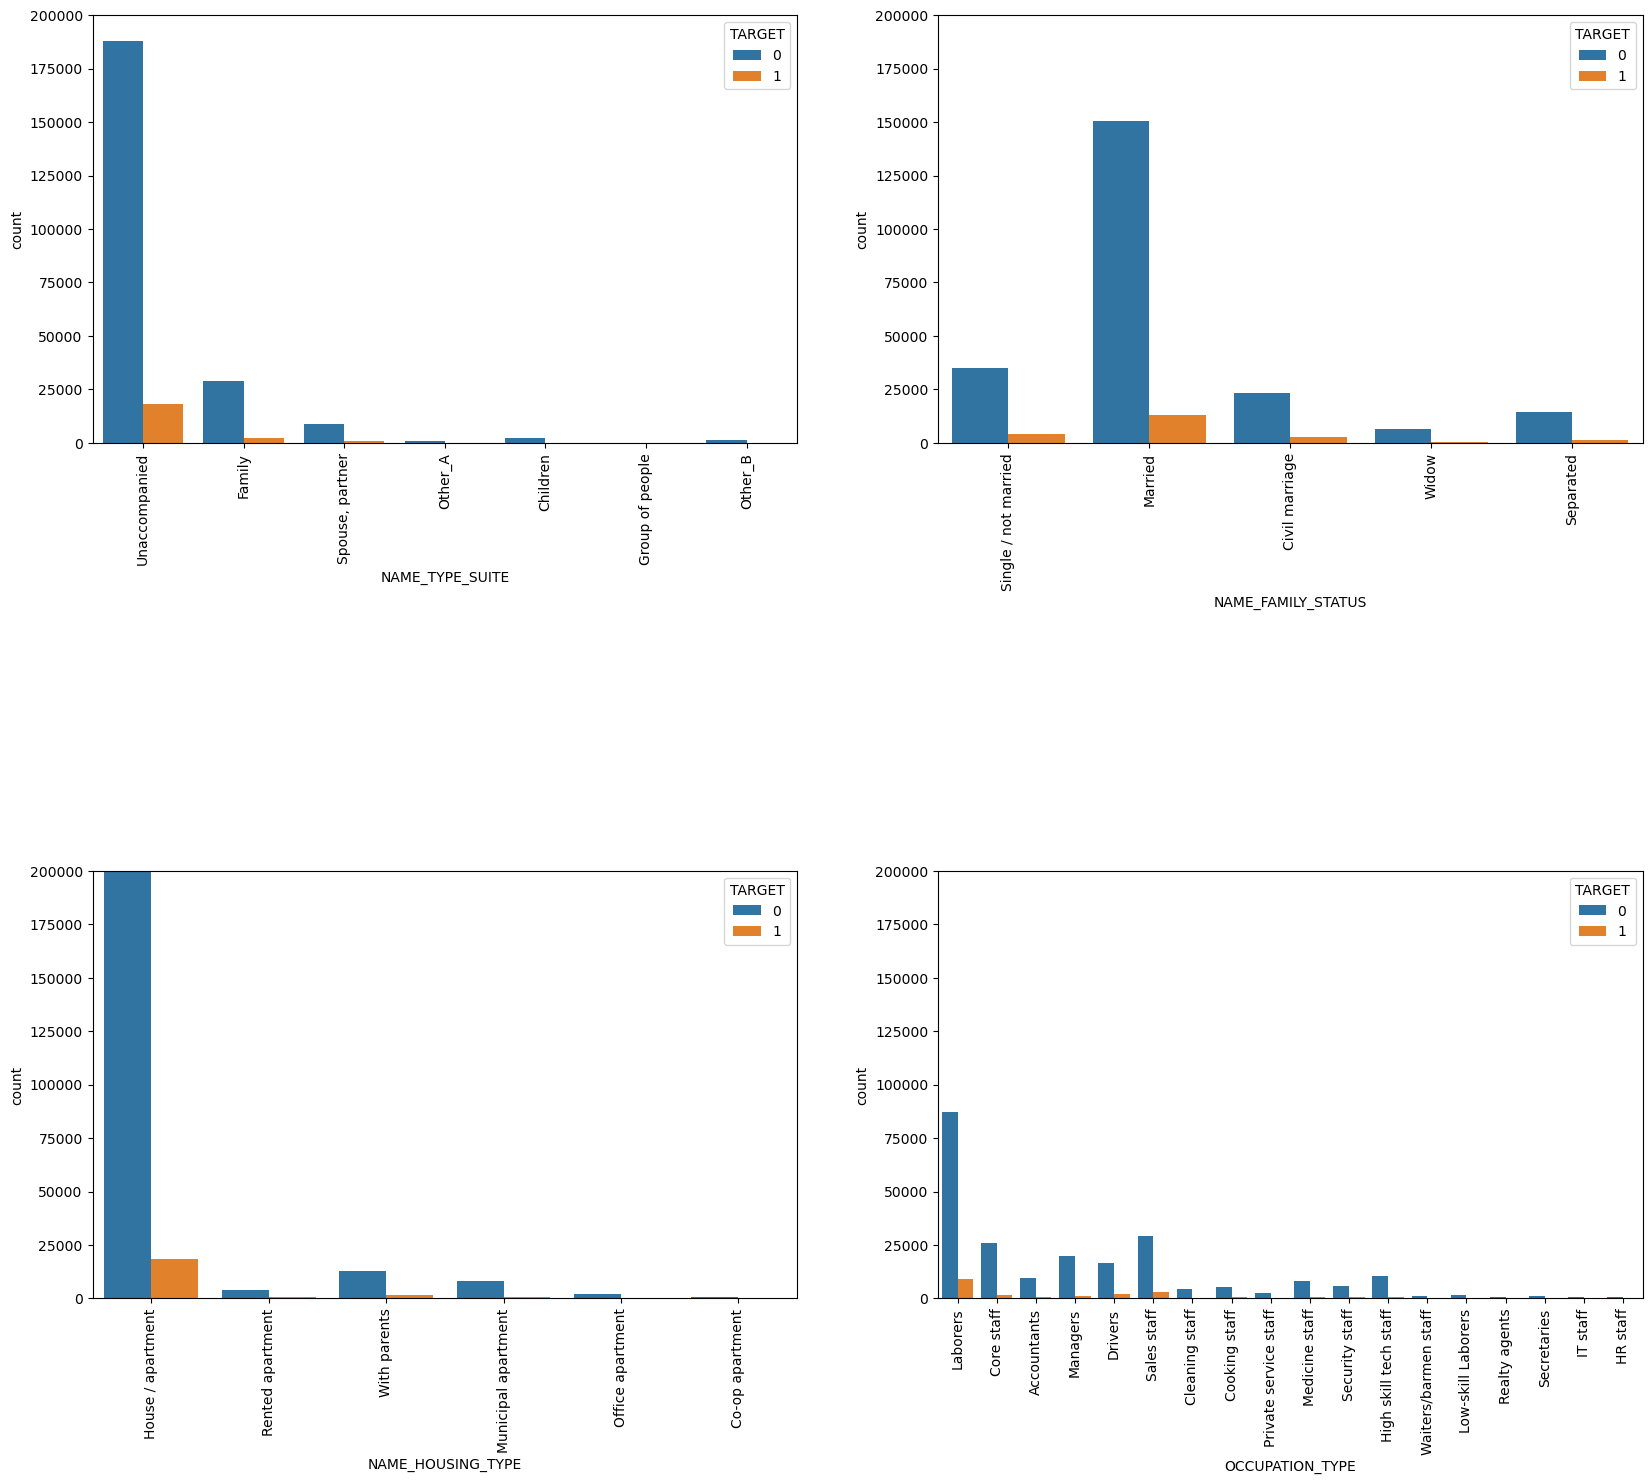

In [118]:
plt.figure(figsize = (20, 50))
plt.subplots_adjust(hspace=1)
for i in enumerate(Columns_2):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = df1)
    plt.xticks(rotation = 90)
    plt.ylim(0,200000)

### Insight
1.Column_1

1. CODE_GENDER: Female clients pay loan faster comparatively to men.
 
2. NAME_INCOME_TYPE: Working clients should be given preference to lend loans comparatively to other clients.
 
3. CNT_CHILDREN:Clients with no children, or single clients pay loan faster than clients with kids.
 
4. NAME_EDUCATION_TYPE: Clients with higher education, i.e. with secondary educations should be preferred.
 
2.Column_2

1. NAME_TYPE_SUITE: Clients who were unaccompanied were the one who payed loan faster then other groups. 

2. NAME_FAMILY_STATUS: Clients , especially Married had payed loan on time.

3. NAME_HOUSING_TYPE: Clients with house/apartment had payed loan on time whereas the co-op apartment were the opposite

4. OCCUPATION_TYPE: Laborers have payed loan on time comparatively to other groups whereas HR staff delayed on loan payment.






### Univariate analysis for continous columns 
1.AMT_CREDIT

2.AMT_ANNUITY

3.AMT_GOODS_PRICE

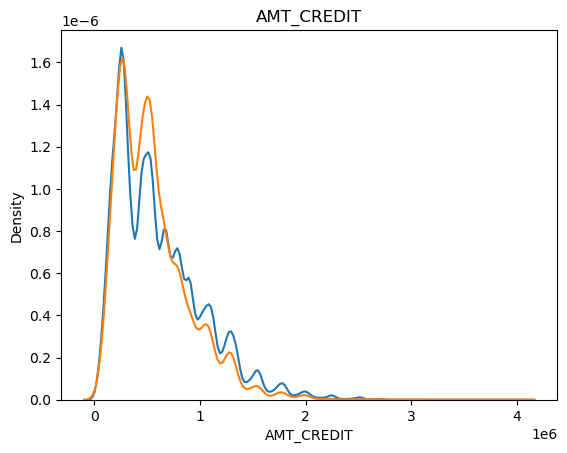

In [119]:
#Analyse continuous column with respect to the target column
sns.distplot(TARGET_0['AMT_CREDIT'], hist = False, label="TARGET_0")
sns.distplot(TARGET_1['AMT_CREDIT'], hist = False, label='TARGET_1')
plt.title('AMT_CREDIT')
plt.show()

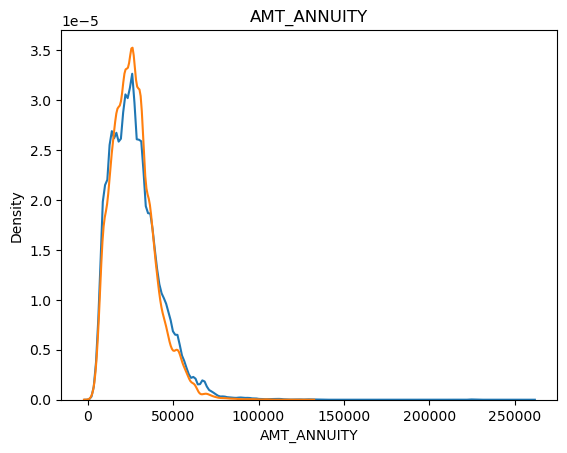

In [97]:
#Analyse continuous column with respect to the target column
sns.distplot(TARGET_0['AMT_ANNUITY'], hist = False, label="TARGET_0")
sns.distplot(TARGET_1['AMT_ANNUITY'], hist = False, label="TARGET_1")
plt.title('AMT_ANNUITY')
plt.show()

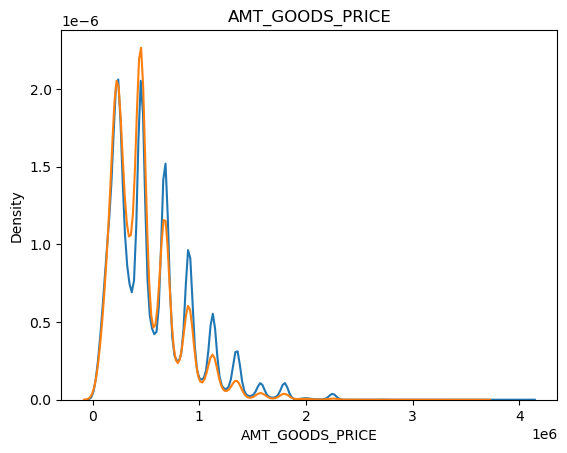

In [98]:
#Analyse continuous column with respect to the target column
sns.distplot(TARGET_0['AMT_GOODS_PRICE'], hist = False,label= "TARGET_0")
sns.distplot(TARGET_1['AMT_GOODS_PRICE'], hist = False, label="TARGET_1")
plt.title('AMT_GOODS_PRICE')
plt.show()

### Bivariate Analysis
1.Income vs Credit

2.Goods price vs Credit

3.Income range- Gender

4.Credit amount vs Education Status

5.Income vs Education Status

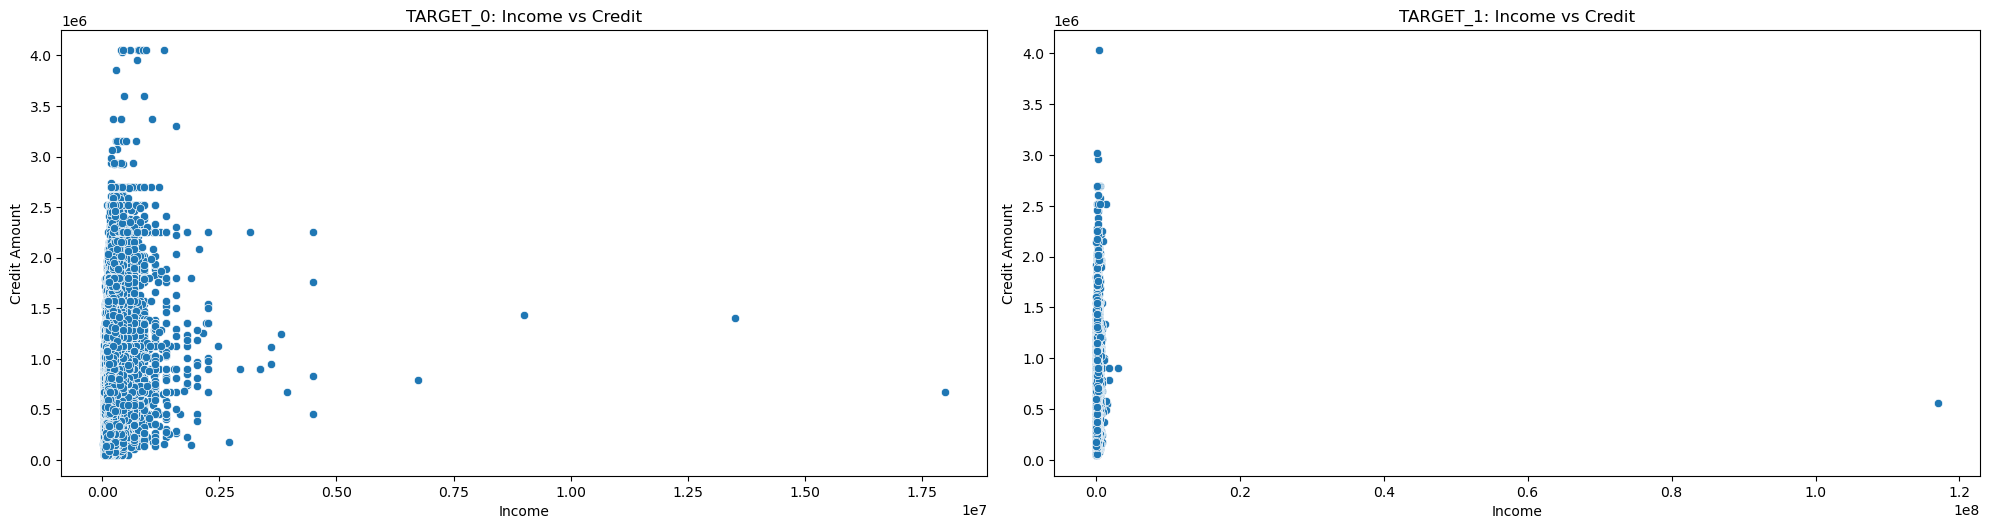

In [120]:
# Set up the figure and axes
plt.figure(figsize=(20, 10))

# Plot for clients with no payment issues (TARGET_0)
plt.subplot(2, 2, 1)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=TARGET_0)
plt.xlabel('Income')
plt.ylabel('Credit Amount')
plt.title('TARGET_0: Income vs Credit')

# Plot for clients with payment issues (TARGET_1)
plt.subplot(2, 2, 2)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=TARGET_1)
plt.xlabel('Income')
plt.ylabel('Credit Amount')
plt.title('TARGET_1: Income vs Credit')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

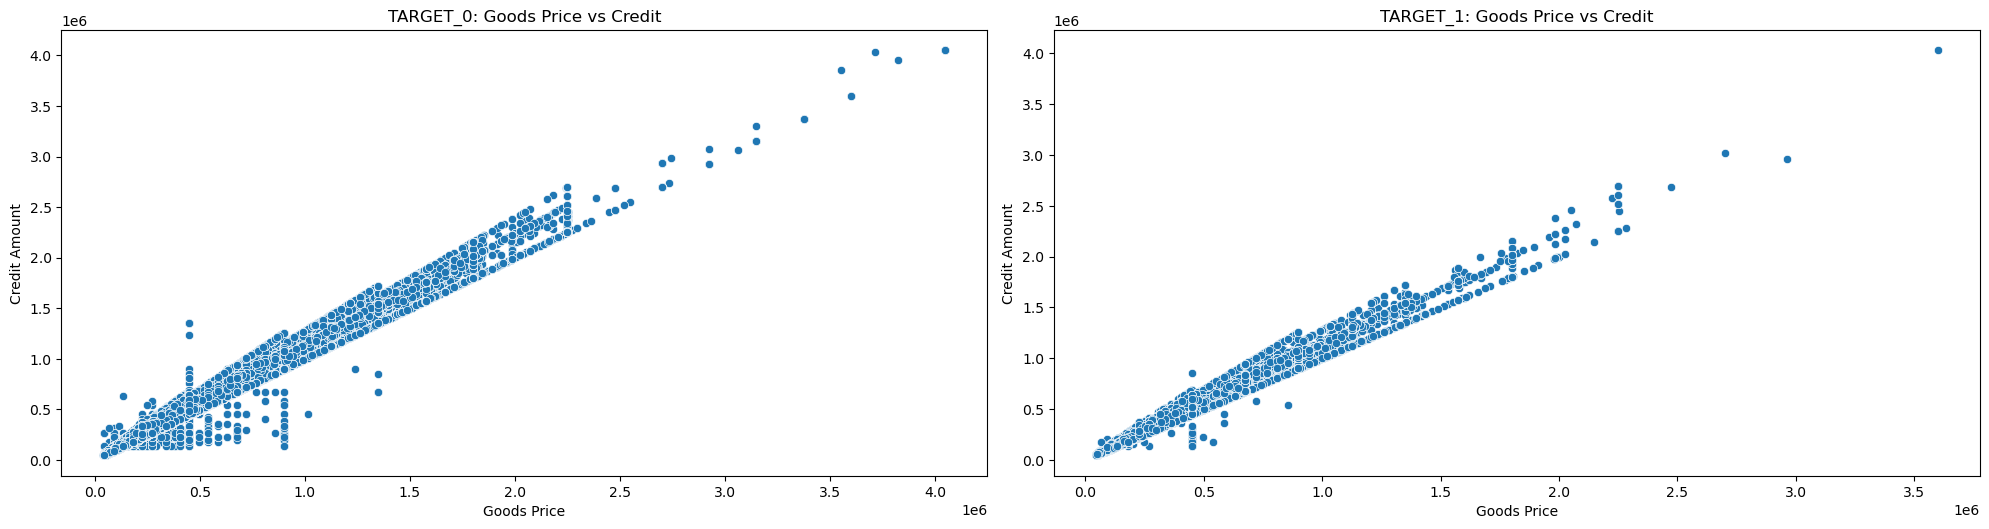

In [122]:
# Set up the figure and axes
plt.figure(figsize=(20, 10))

# Plot for clients with no payment issues (TARGET_0)
plt.subplot(2, 2, 1)
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=TARGET_0)
plt.xlabel('Goods Price')
plt.ylabel('Credit Amount')
plt.title('TARGET_0: Goods Price vs Credit')

# Plot for clients with payment issues (TARGET_1)
plt.subplot(2, 2, 2)
sns.scatterplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=TARGET_1)
plt.xlabel('Goods Price')
plt.ylabel('Credit Amount')
plt.title('TARGET_1: Goods Price vs Credit')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#Income range- Gender

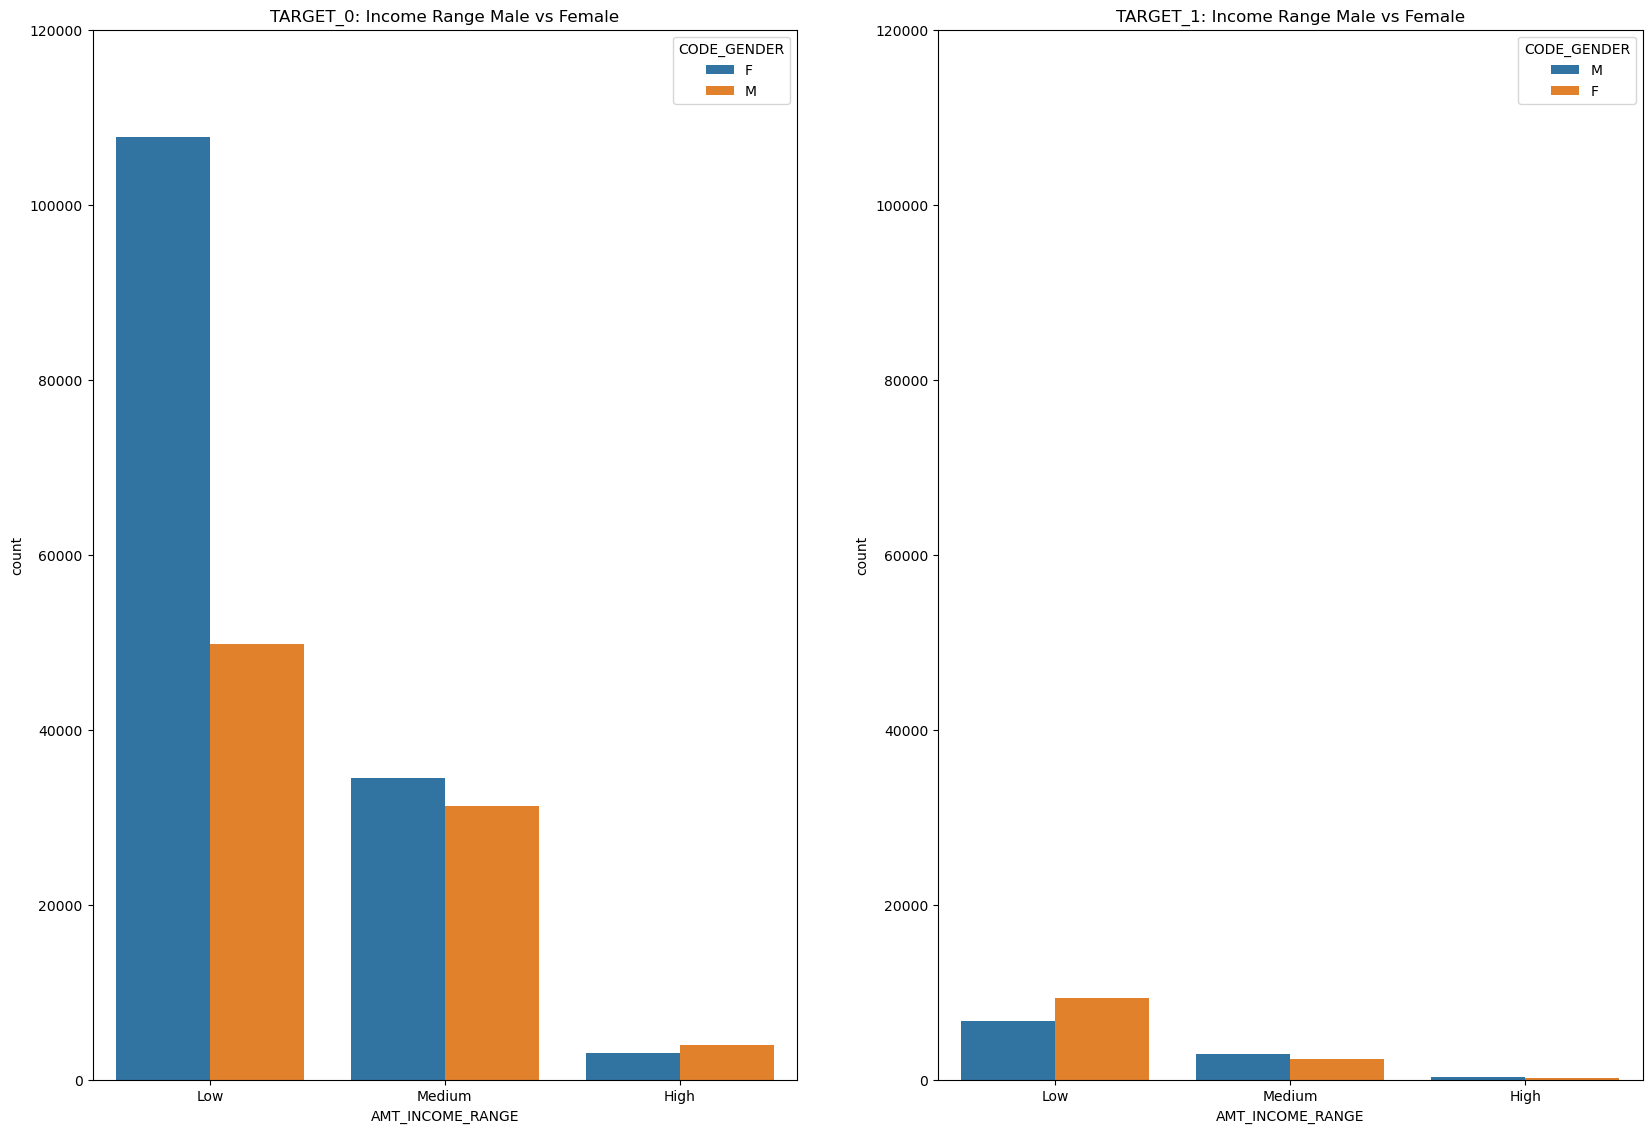

In [123]:
plt.figure(figsize = (20, 30))
plt.subplot(2, 2, 1)
plt.title('TARGET_0: Income Range Male vs Female')
sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=TARGET_0)
plt.ylim(0,120000)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('TARGET_1: Income Range Male vs Female')
sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=TARGET_1)
plt.ylim(0,120000)
plt.show()

In [ ]:
#Credit amount vs Education Status

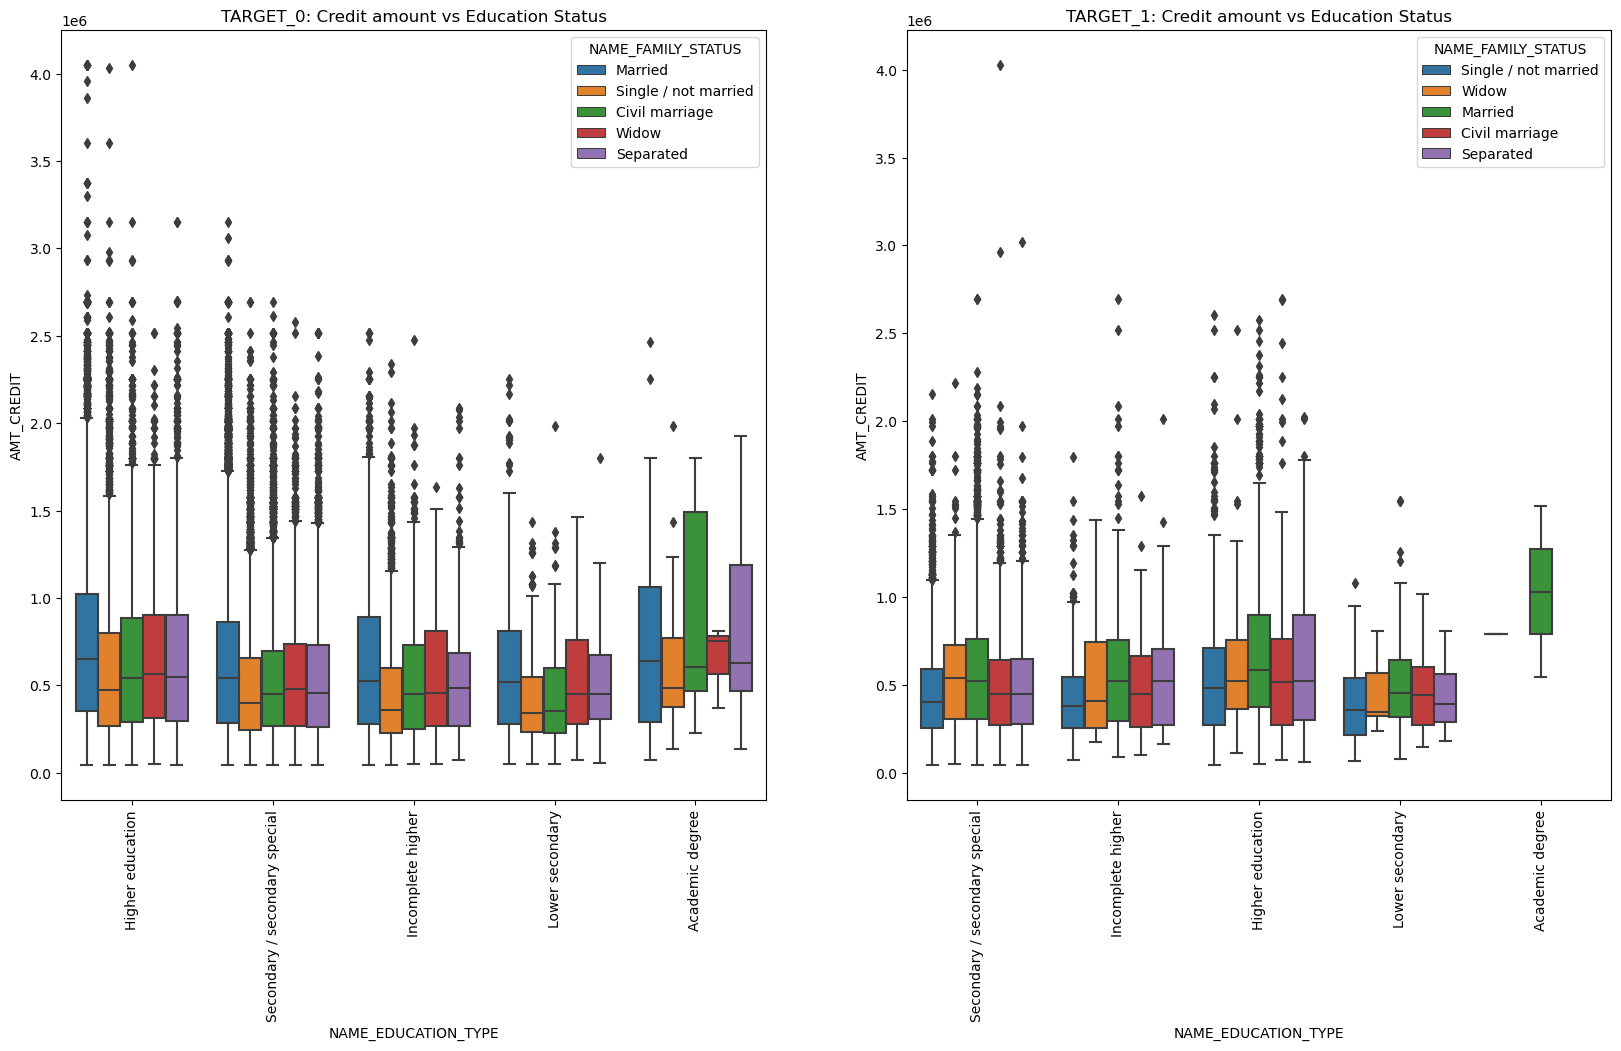

In [124]:
plt.figure(figsize=(20,10))
#plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
sns.boxplot(data =TARGET_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('TARGET_0: Credit amount vs Education Status')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data =TARGET_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('TARGET_1: Credit amount vs Education Status')
plt.xticks(rotation=90)
plt.show()

In [125]:
#Income vs Education Status

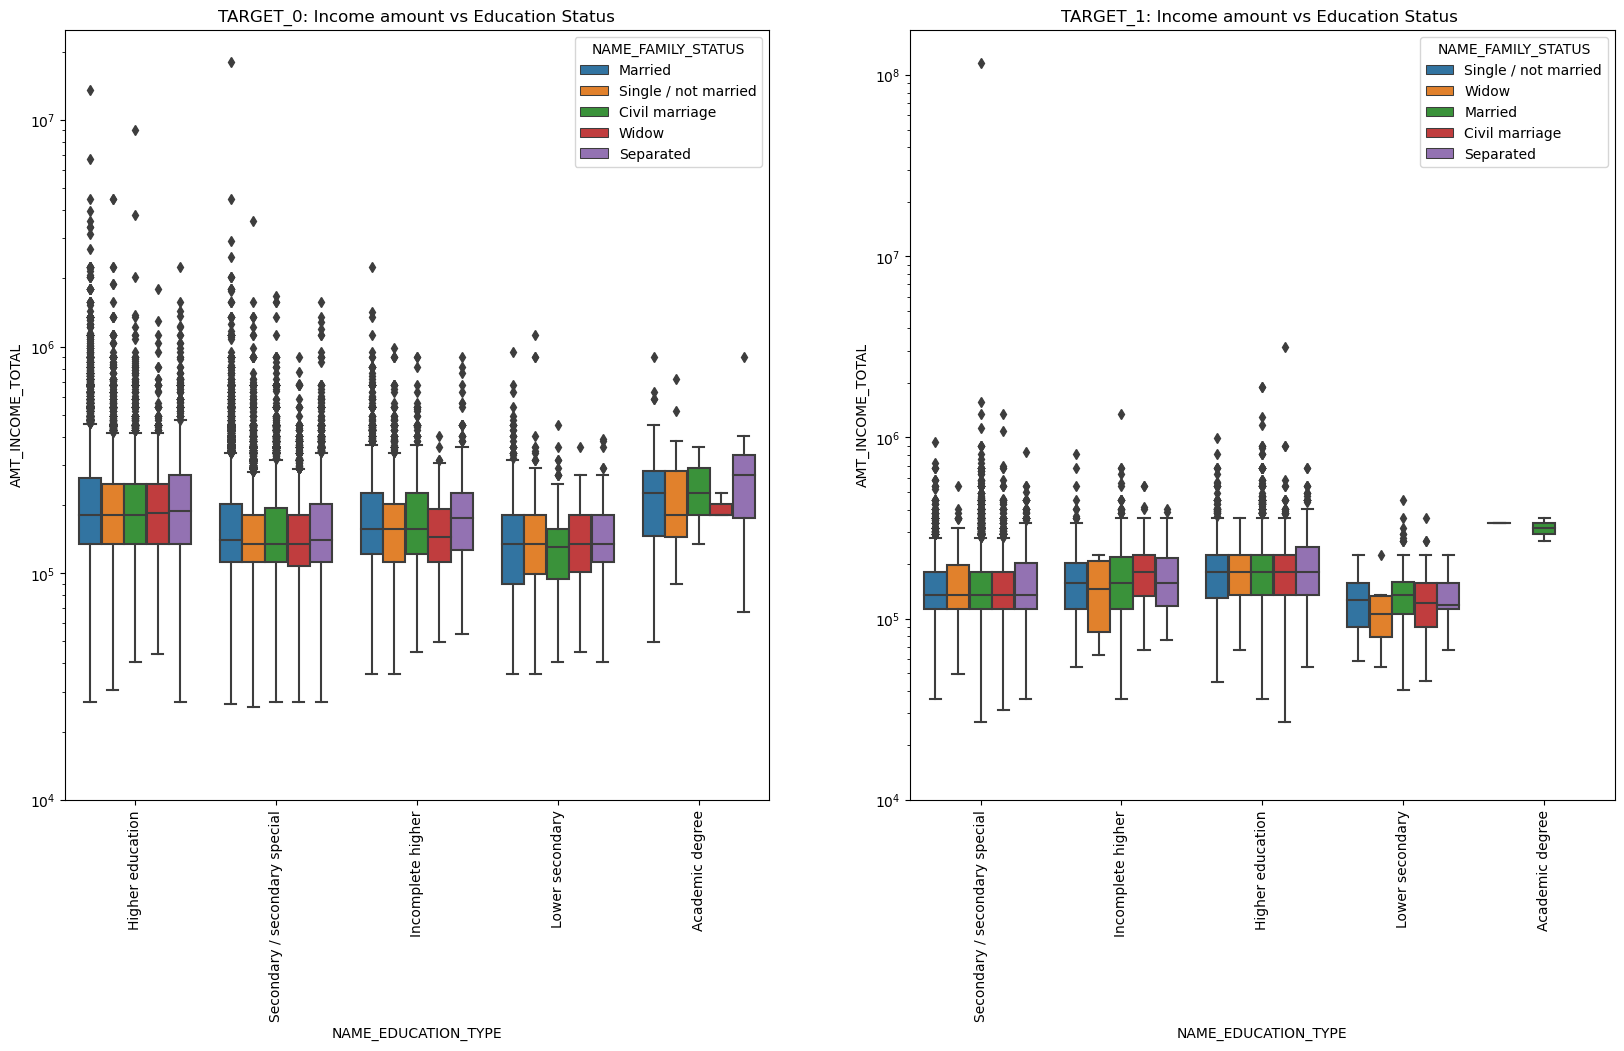

In [126]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =TARGET_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('TARGET_0: Income amount vs Education Status')
plt.xticks(rotation=90)
plt.ylim(10000)



plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =TARGET_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('TARGET_1: Income amount vs Education Status ')
plt.xticks(rotation=90)
plt.ylim(10000)
plt.show()

### Insight
1.Income vs Credit : The income of a client plays an huge role on the amount credited to the clients, as they tend to do timely payments.

2.Goods price vs Credit : Also the goods price and the crdit seems to have a trend, and the clients have higher credits who was  able to pay on time verses the deflauters groups.

3.Income range- Gender: Females in the low income range don't have payment issues.

4.Credit amount vs Education Status : highly educated, married person are having credits higher than those who have done lower secondary eduction, they tend to make payments on time comparatively to others. (More outliers are also seen in this category)



5.Income vs Education Status : Higher the eduation, higer the income, hence no difficuties for loan payments





In [127]:
TARGET_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,School,Medium,High,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,Government,Low,Low,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.0,2437,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3,Low,Low,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.0,3458,Core staff,1.0,THURSDAY,11,Religion,Low,Medium,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,16941,1588,4970.0,477,Laborers,2.0,WEDNESDAY,16,Other,Low,Medium,40-50


In [128]:
#Plotting Correlation matrix for Target 0 application data
x=TARGET_0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']]

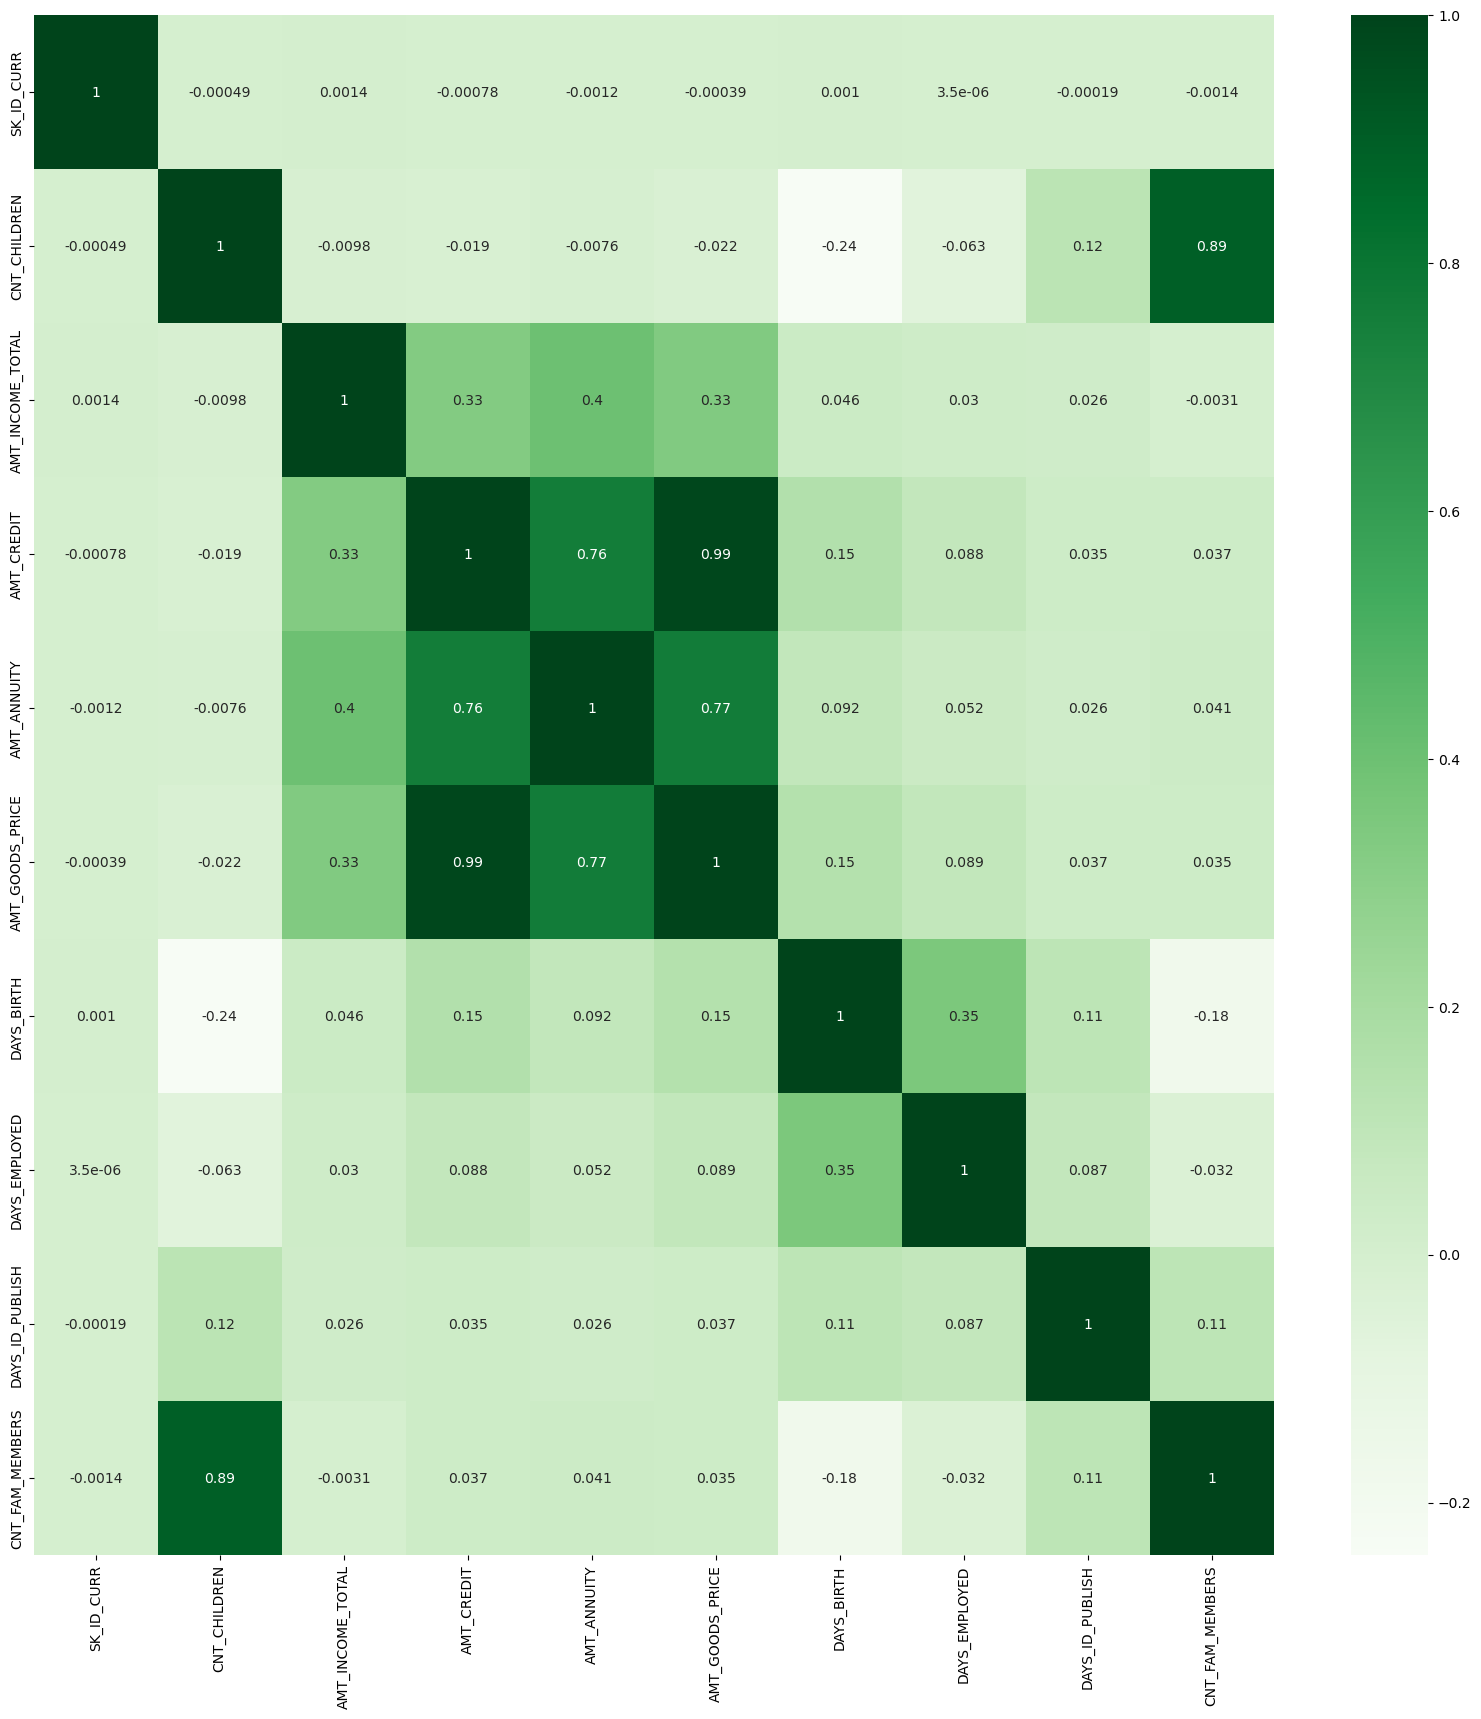

In [129]:
plt.figure(figsize=(20,20))

sns.heatmap(x.corr(), cmap="Greens", annot=True)
plt.show()

### Insight
The columns which are highly correlated with Non-Defaulters are

'CNT_CHILDREN' and 'CNT_FAM_MEMBERS', 'AMT_CREDIT' and 'AMT_GOODS_PRICE','AMT_CREDIT' and 'AMT_ANNUITY','AMT_ANNUITY'and 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL', hence these parameters can be used to determined for non-defaulters

In [130]:
#Plotting Correlation matrix for Target 1 application data
y=TARGET_1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']]

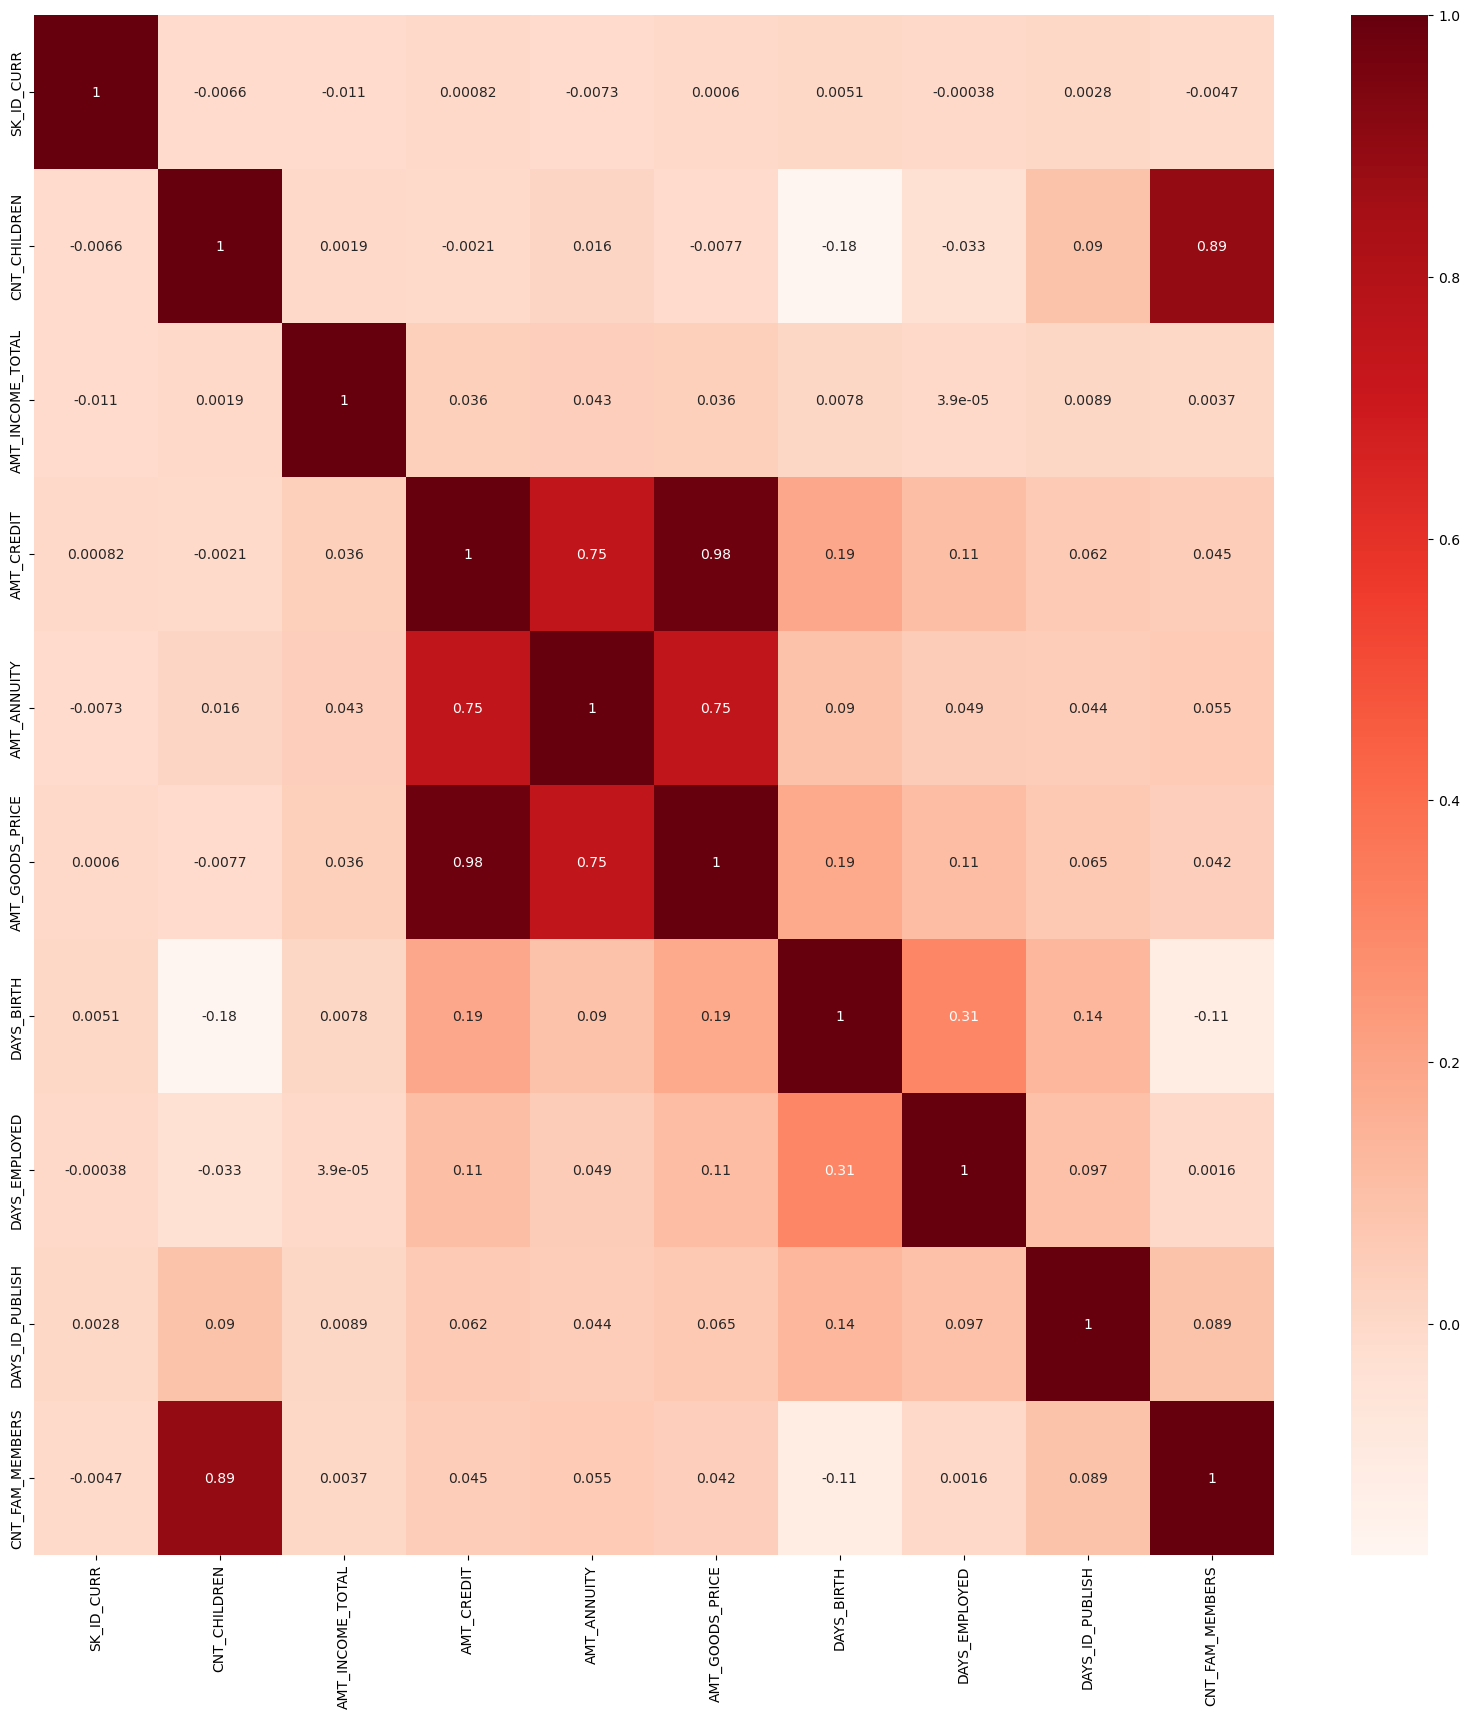

In [131]:
plt.figure(figsize=(20,20))

sns.heatmap(y.corr(), cmap="Reds", annot=True)
plt.show()

### Insight
The columns which are highly correlated with Defaulters are also similar to non-defaulters.

'CNT_CHILDREN' and 'CNT_FAM_MEMBERS', 'AMT_CREDIT' and 'AMT_GOODS_PRICE','AMT_CREDIT' and 'AMT_ANNUITY','AMT_ANNUITY'and 'AMT_GOODS_PRICE','AMT_INCOME_TOTAL', hence these parameters can be used to determined for defaulters as well.

## Previous_application_dataset

In [132]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df2.shape

(1670214, 37)

In [134]:
df2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [135]:
# Cleaning the missing data
#checking null values
df2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [136]:
#assigning and sorting all the null values by percentage
isnull = df2.isnull().mean()*100
isnull.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [137]:
isnull.sort_values(ascending=False).head(15)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
dtype: float64

In [138]:
#Columns with high missing percentage >=35%
isnull=isnull[isnull>=35]
isnull

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [139]:
label = list(isnull.index.values) #Making list of column names having null values greater than 35%
df2.drop(labels = label,axis=1,inplace = True) #Droping columns
df2.shape

(1670214, 26)

In [140]:
# Checking the columns after removing high missing values(>=35%)
df2.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [141]:
df2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [142]:
# Removing the column values of 'XNA' and 'XAP'
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df2=df2.drop(df2[df2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [143]:
#dropping NaN values
df2 = df2[df2['AMT_ANNUITY'].notna()]
df2 = df2[df2['AMT_GOODS_PRICE'].notna()]
df2 = df2[df2['CNT_PAYMENT'].notna()]
df2 = df2[df2['PRODUCT_COMBINATION'].notna()]
df2 = df2[df2['AMT_CREDIT'].notna()]

In [144]:
df2.isnull().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [145]:
df2.shape

(69372, 26)

## 7. Merge two datasets

In [147]:
# Merge the previous application with the current application data file
# 'how' parameter specifies the type of merge (inner, outer, left, right)
# 'on' parameter specifies the column to merge on
# 'suffixes' parameter adds a suffix to overlapping column names
merged_df = pd.merge(df1, df2, how='inner', on='SK_ID_CURR', suffixes=('_prev', '_curr'))

# Display the first few rows of the merged DataFrame
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_prev,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_prev,AMT_ANNUITY_prev,AMT_GOODS_PRICE_prev,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_curr,AMT_ANNUITY_curr,AMT_APPLICATION,AMT_CREDIT_curr,AMT_GOODS_PRICE_curr,WEEKDAY_APPR_PROCESS_START_curr,HOUR_APPR_PROCESS_START_curr,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,10341,1010,4799.0,3015,Laborers,1.0,TUESDAY,16,Business Entity Type 3,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,15280,2668,5266.0,3787,Laborers,2.0,WEDNESDAY,13,Business Entity Type 3,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,11694,2060,3557.0,3557,Drivers,3.0,THURSDAY,10,Self-employed,Medium,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,16126,1761,8236.0,4292,Managers,2.0,TUESDAY,8,Business Entity Type 3,Low,Medium,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,16126,1761,8236.0,4292,Managers,2.0,TUESDAY,8,Business Entity Type 3,Low,Medium,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [148]:
# Renaming the column names after merging

df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [149]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_prev,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_prev,AMT_ANNUITY_prev,AMT_GOODS_PRICE_prev,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_curr,AMT_ANNUITY_curr,AMT_APPLICATION,AMT_CREDIT_curr,AMT_GOODS_PRICE_curr,WEEKDAY_APPR_PROCESS_START_curr,HOUR_APPR_PROCESS_START_curr,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,10341,1010,4799.0,3015,Laborers,1.0,TUESDAY,16,Business Entity Type 3,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,15280,2668,5266.0,3787,Laborers,2.0,WEDNESDAY,13,Business Entity Type 3,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,11694,2060,3557.0,3557,Drivers,3.0,THURSDAY,10,Self-employed,Medium,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,16126,1761,8236.0,4292,Managers,2.0,TUESDAY,8,Business Entity Type 3,Low,Medium,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,16126,1761,8236.0,4292,Managers,2.0,TUESDAY,8,Business Entity Type 3,Low,Medium,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [152]:
# Drop specified columns from the DataFrame
# 'SK_ID_CURR' and other columns listed are dropped from the DataFrame
# 'axis=1' specifies that columns are being dropped, 'inplace=True' modifies the DataFrame in place
# List of columns to be dropped
columns_to_drop = ['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                   'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_START_PREV',
                   'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']

# Check if the columns exist in the DataFrame before dropping
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns from the DataFrame
if columns_to_drop_existing:
    df.drop(columns_to_drop_existing, axis=1, inplace=True)
    print("Columns dropped successfully:", columns_to_drop_existing)
else:
    print("No matching columns found in the DataFrame.")




Columns dropped successfully: ['SK_ID_CURR', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']


In [153]:
df.head()

,TARGET,NAME_CONTRACT_TYPE_prev,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_prev,AMT_ANNUITY_prev,AMT_GOODS_PRICE_prev,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,DAYS_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_curr,AMT_ANNUITY_curr,AMT_APPLICATION,AMT_CREDIT_curr,AMT_GOODS_PRICE_curr,WEEKDAY_APPR_PROCESS_START_curr,HOUR_APPR_PROCESS_START_curr,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,10341,1010,4799.0,3015,Laborers,1.0,TUESDAY,16,Business Entity Type 3,Low,Low,20-30,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,15280,2668,5266.0,3787,Laborers,2.0,WEDNESDAY,13,Business Entity Type 3,Medium,Medium,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,11694,2060,3557.0,3557,Drivers,3.0,THURSDAY,10,Self-employed,Medium,Medium,30-40,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,16126,1761,8236.0,4292,Managers,2.0,TUESDAY,8,Business Entity Type 3,Low,Medium,40-50,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,16126,1761,8236.0,4292,Managers,2.0,TUESDAY,8,Business Entity Type 3,Low,Medium,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


#### Univariate Analysis
1.Distribution of CASH_LOAN_PURPOSE w.r.t target

2.Distribution of CASH_LOAN_PURPOSE w.r.t genders

3.Distribution of CASH_LOAN_PURPOSE w.r.t CONTRACT_STATUS 

4.Distribution of CASH_LOAN_PURPOSE w.r.t OCCUPATION_TYPE

5.Distribution of CASH_LOAN_PURPOSE w.r.t NAME_EDUCATION_TYPE

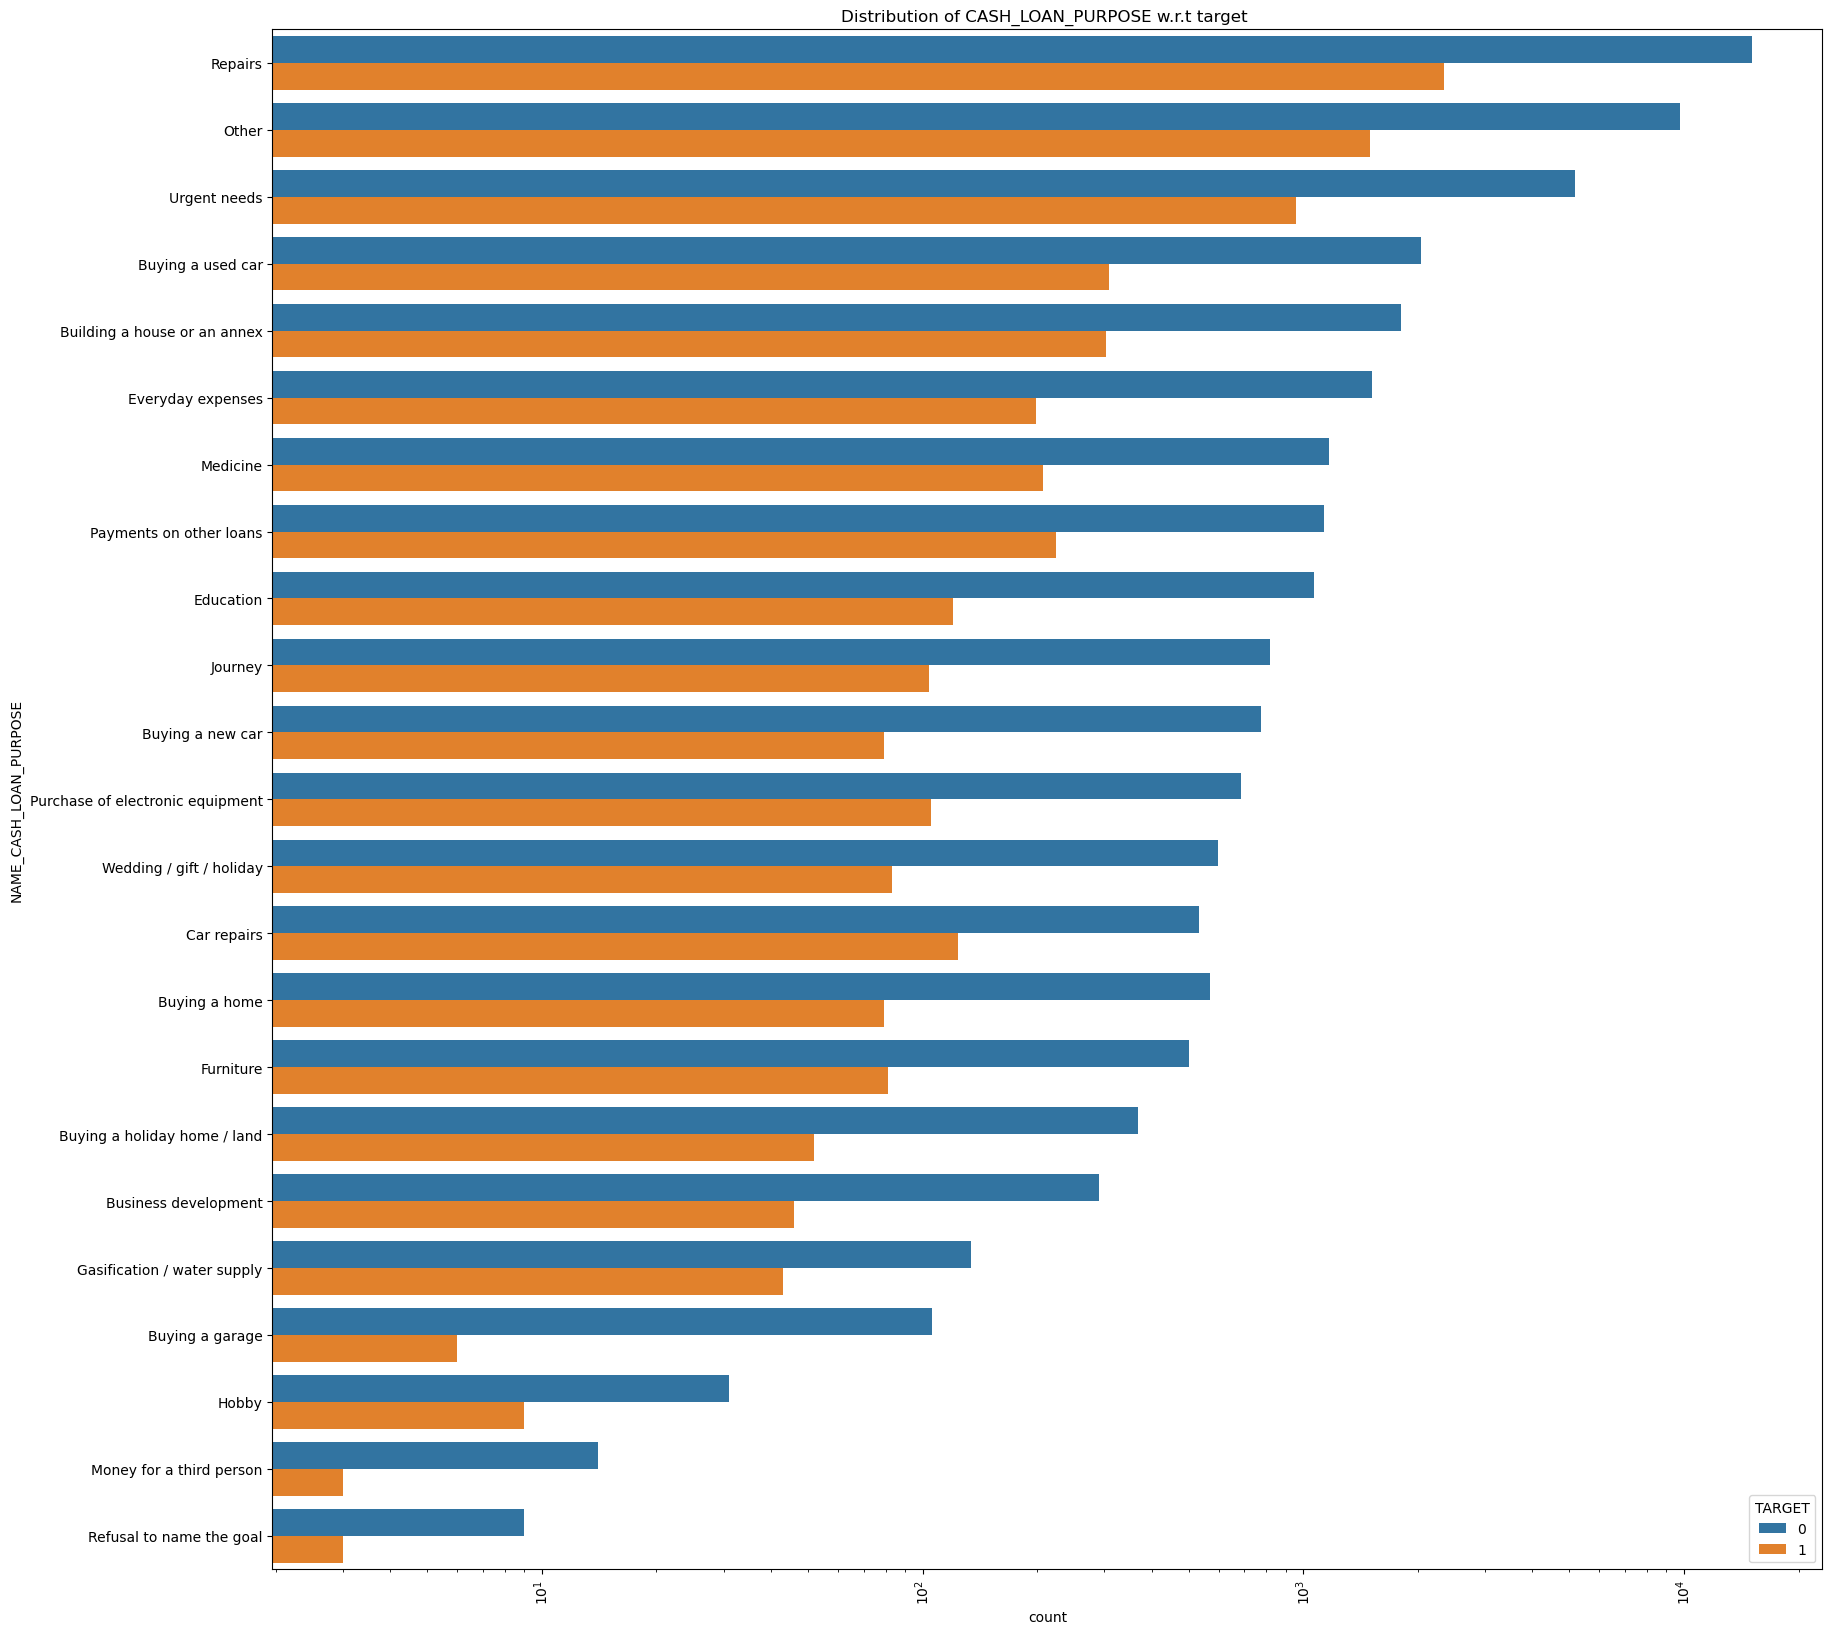

In [154]:
# Distribution of contract status across target

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of CASH_LOAN_PURPOSE w.r.t target ')
sns.countplot(data = df, y= 'NAME_CASH_LOAN_PURPOSE', order=df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')
plt.show()


### Insight

The loans were more credited for Repair purpose and least where there was Refusal to name of the goal.

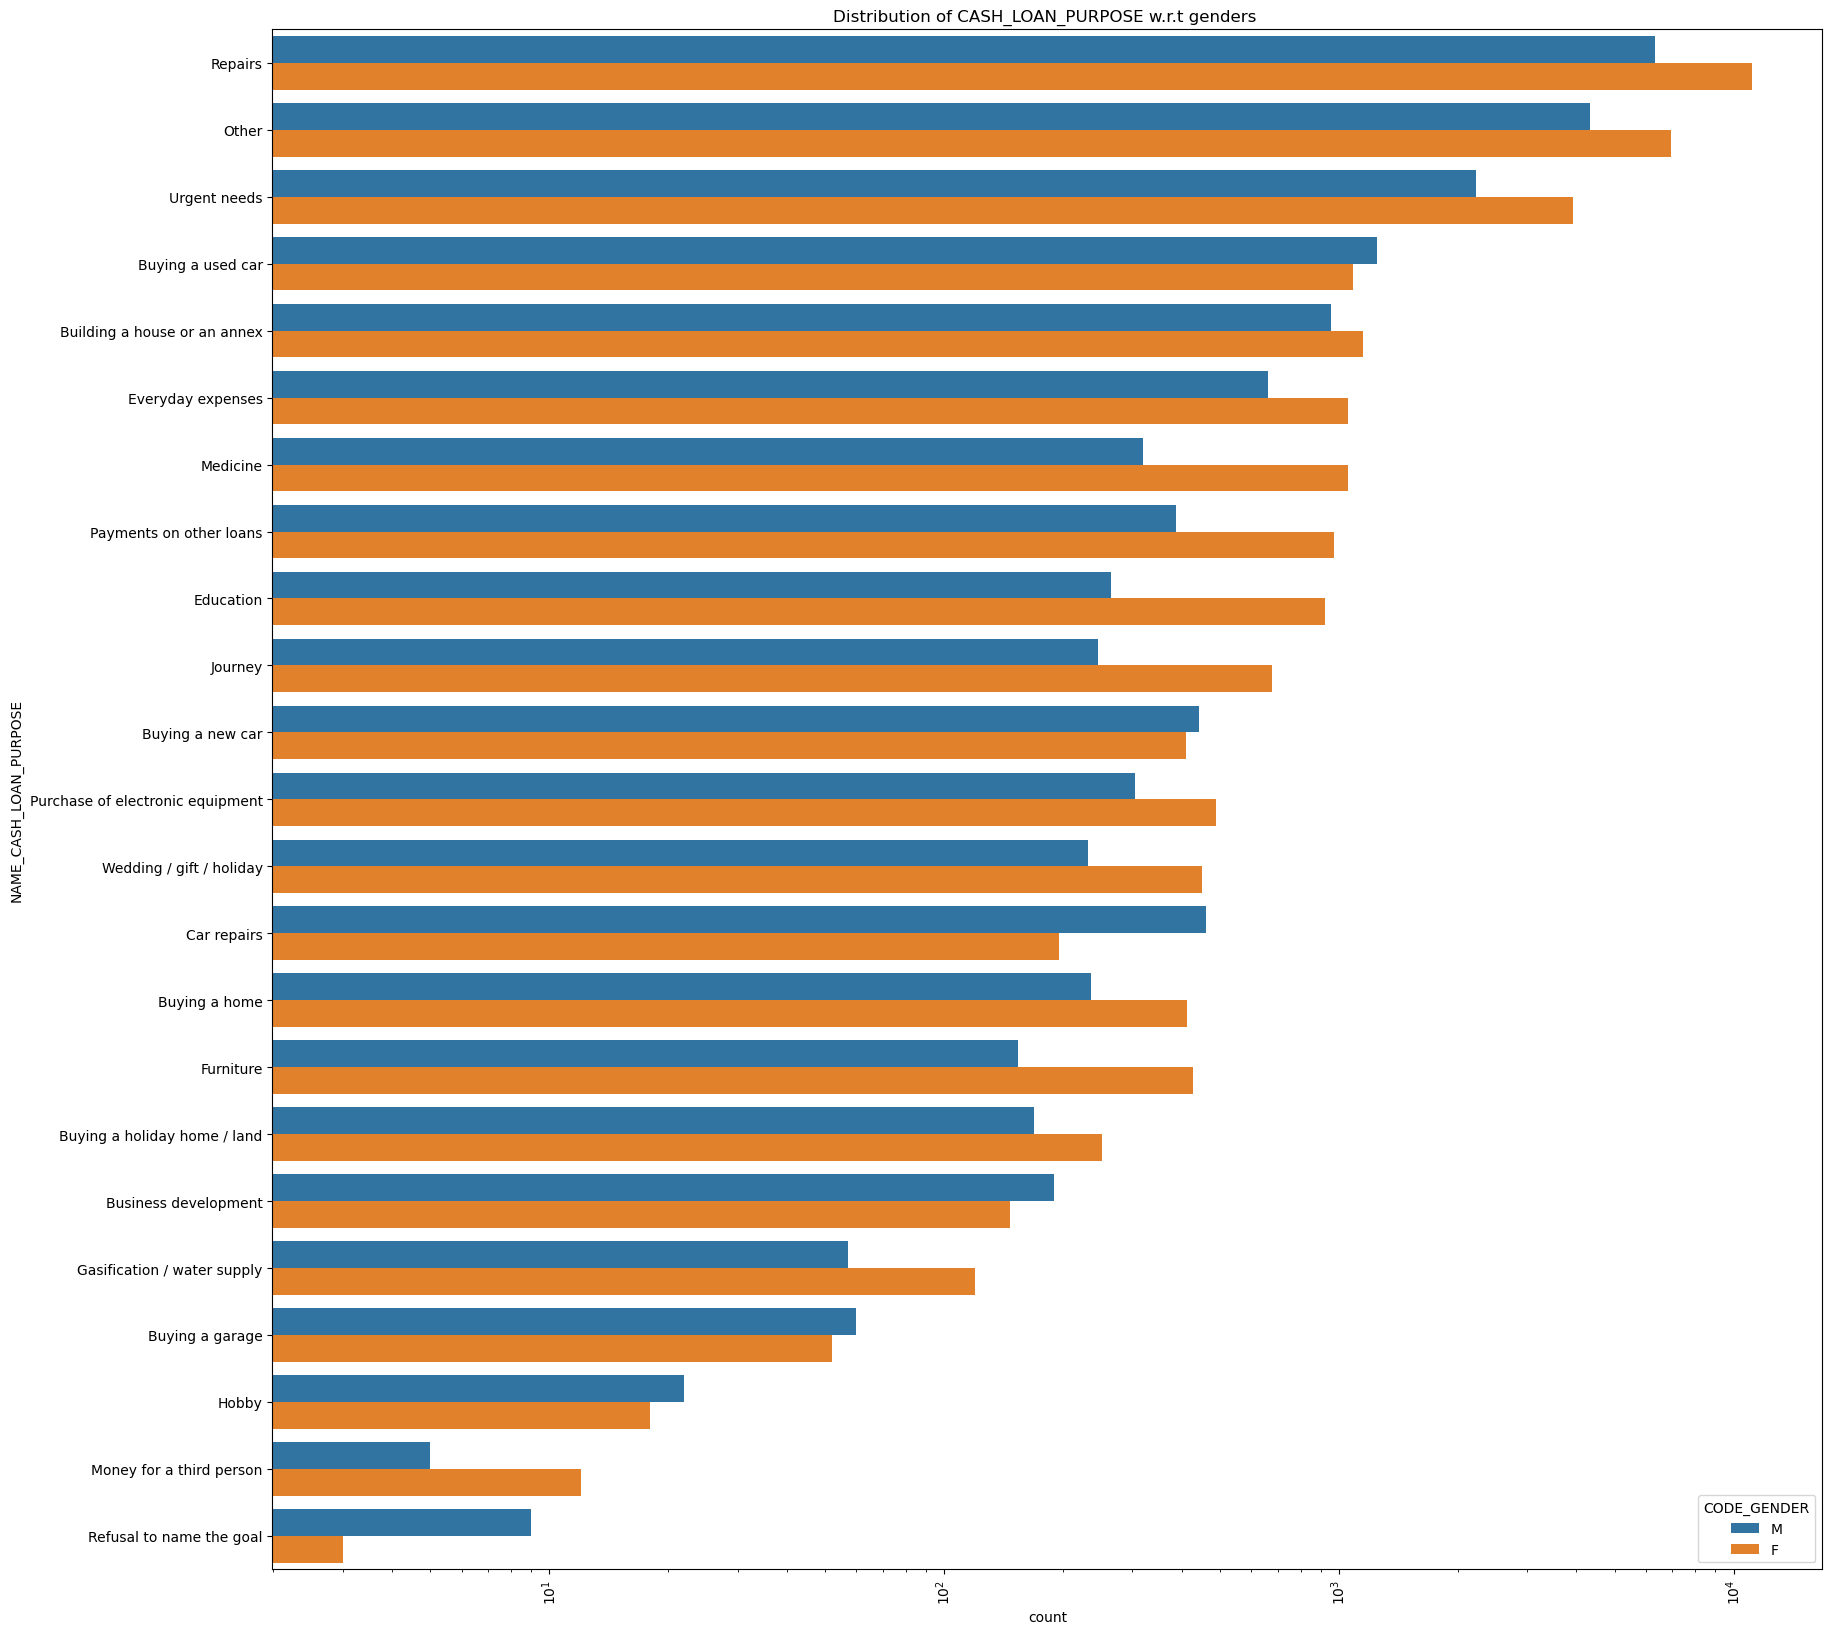

In [155]:
# Distribution of contract status across genders

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of CASH_LOAN_PURPOSE w.r.t genders ')
sns.countplot(data = df, y= 'NAME_CASH_LOAN_PURPOSE', order=df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'CODE_GENDER')
plt.show()

### Insight
The loans were more credited for Repair purpose , more preference was given to females and least where there was Refusal to name of the goal and male fall in these categories.

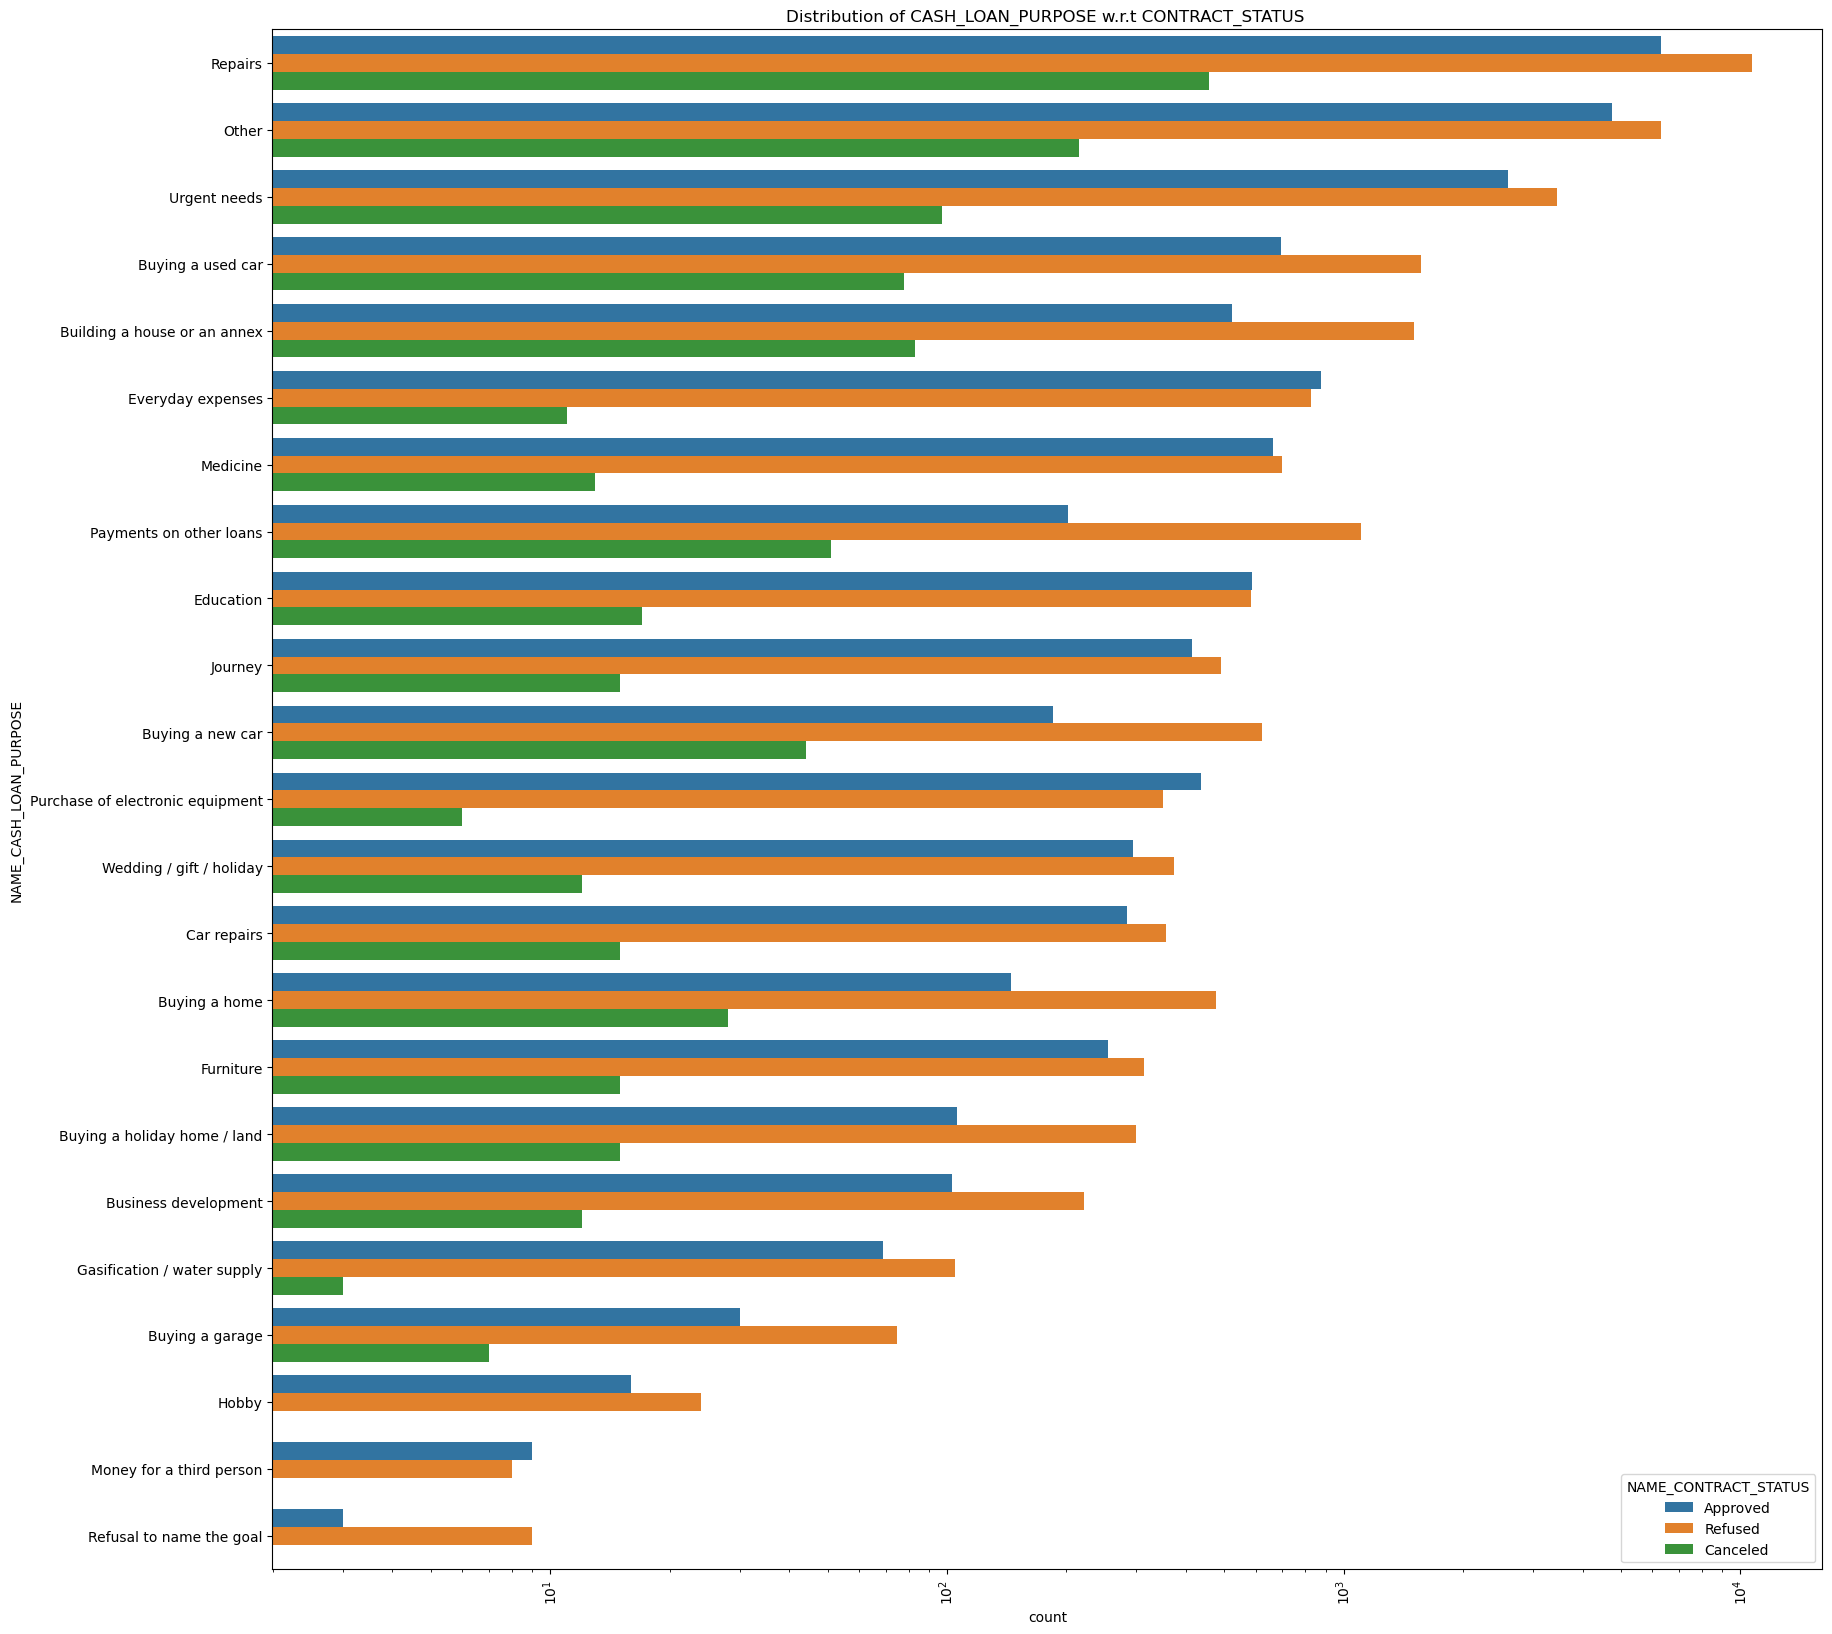

In [156]:
# Distribution of contract status across CONTRACT_STATUS

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of CASH_LOAN_PURPOSE w.r.t CONTRACT_STATUS ')
sns.countplot(data = df, y='NAME_CASH_LOAN_PURPOSE', order=df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
plt.show()

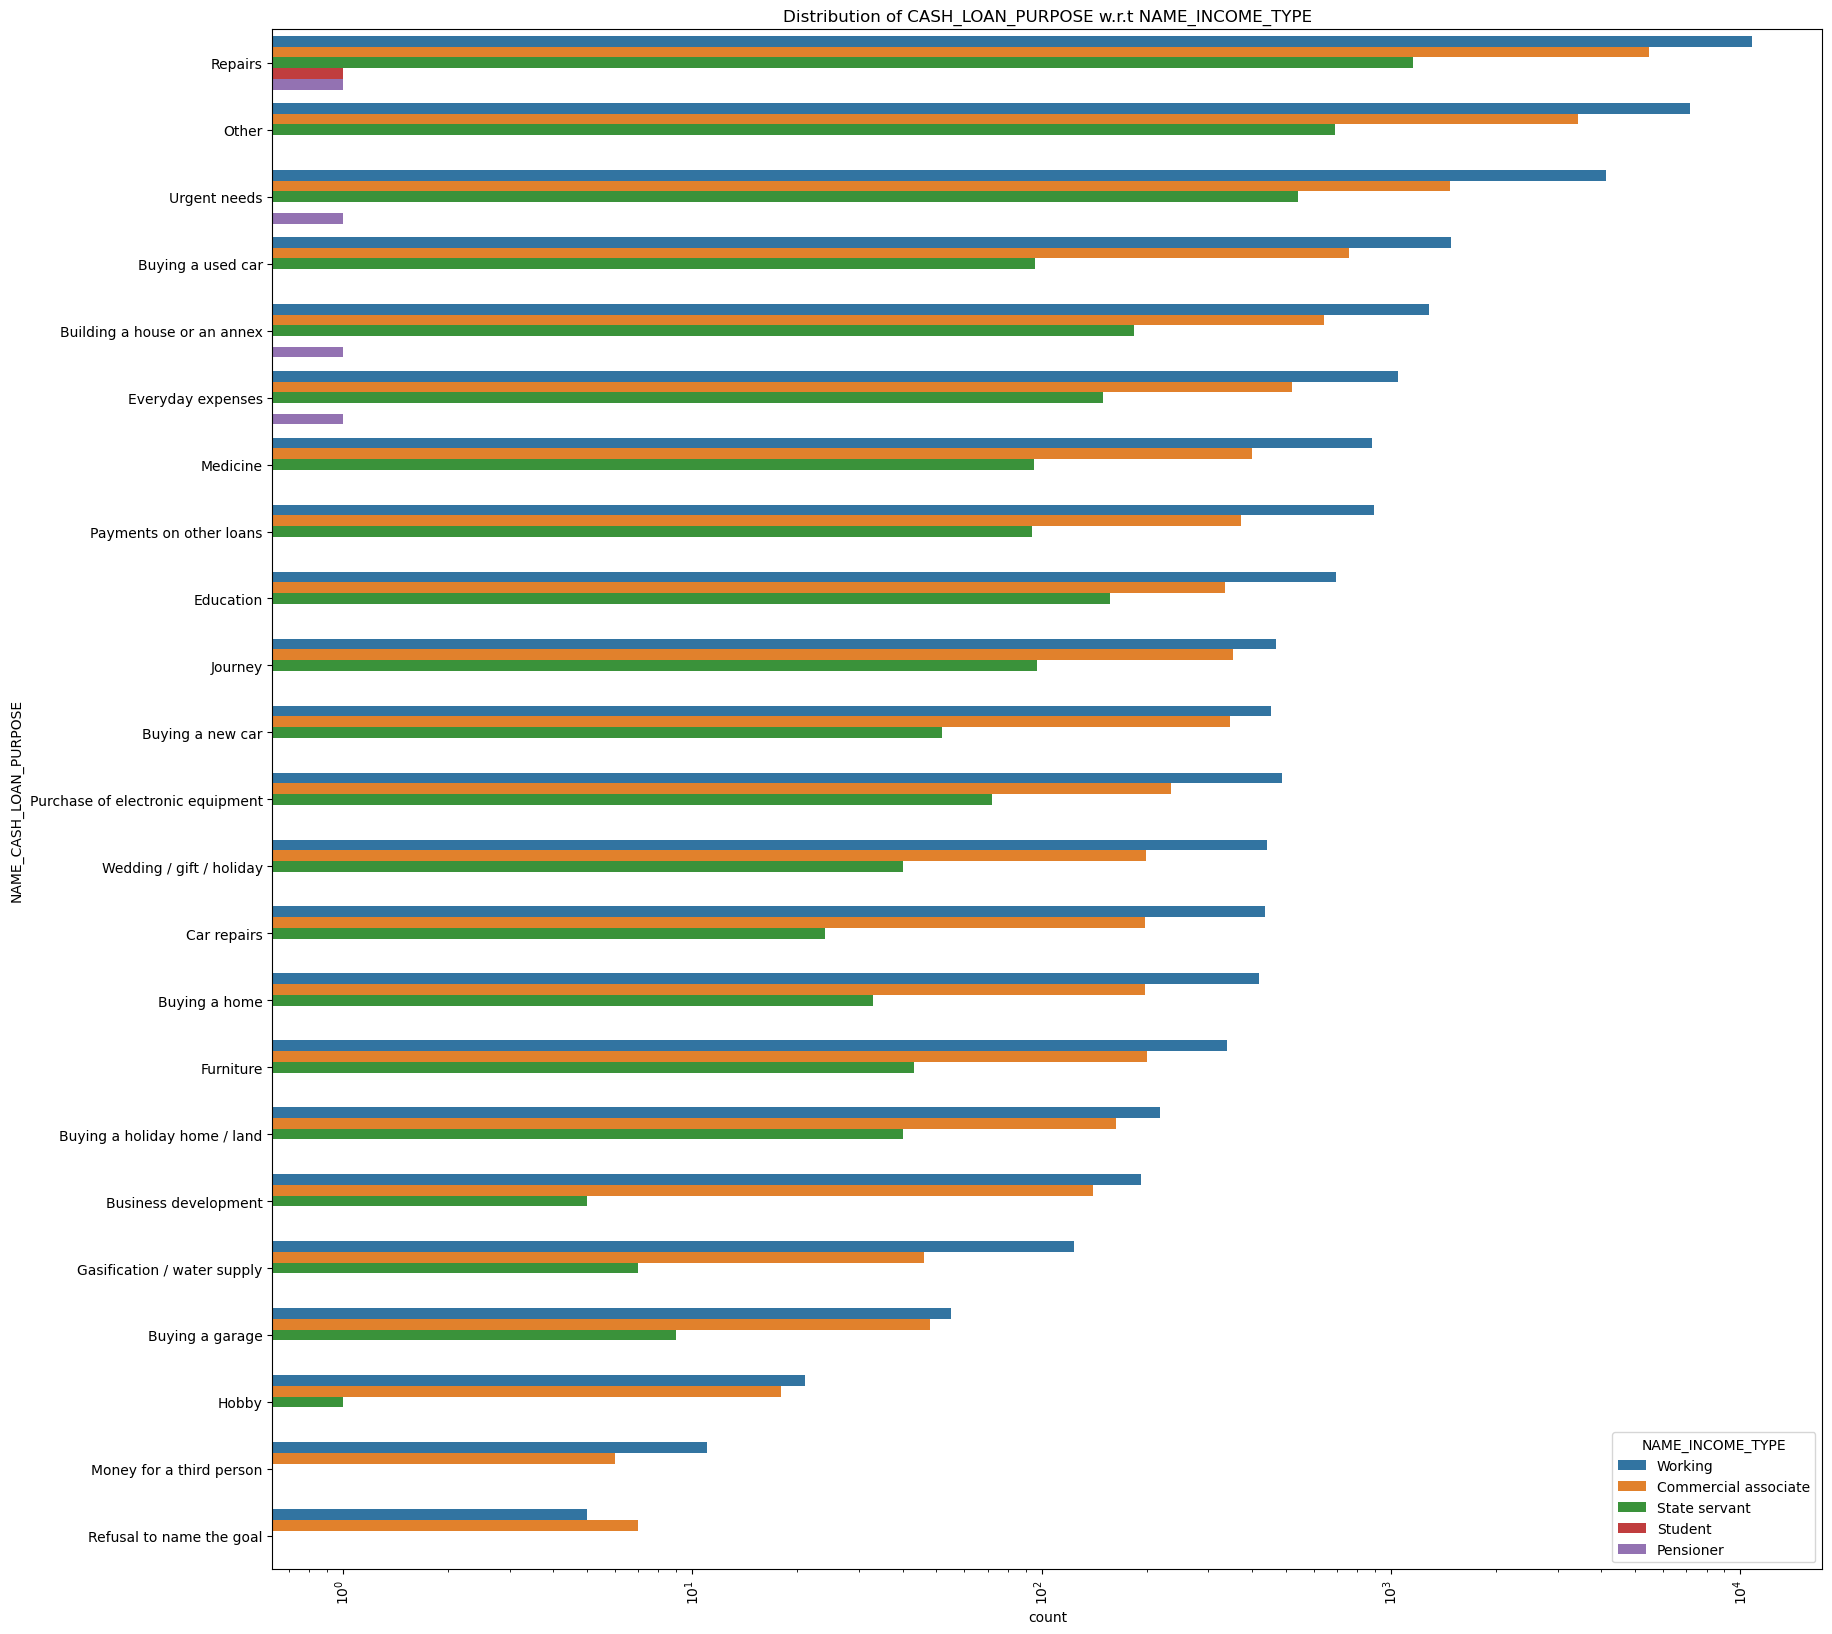

In [157]:
# Distribution of contract status across NAME_INCOME_TYPE

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of CASH_LOAN_PURPOSE w.r.t NAME_INCOME_TYPE')
sns.countplot(data = df, y='NAME_CASH_LOAN_PURPOSE', order=df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_INCOME_TYPE')
plt.show()

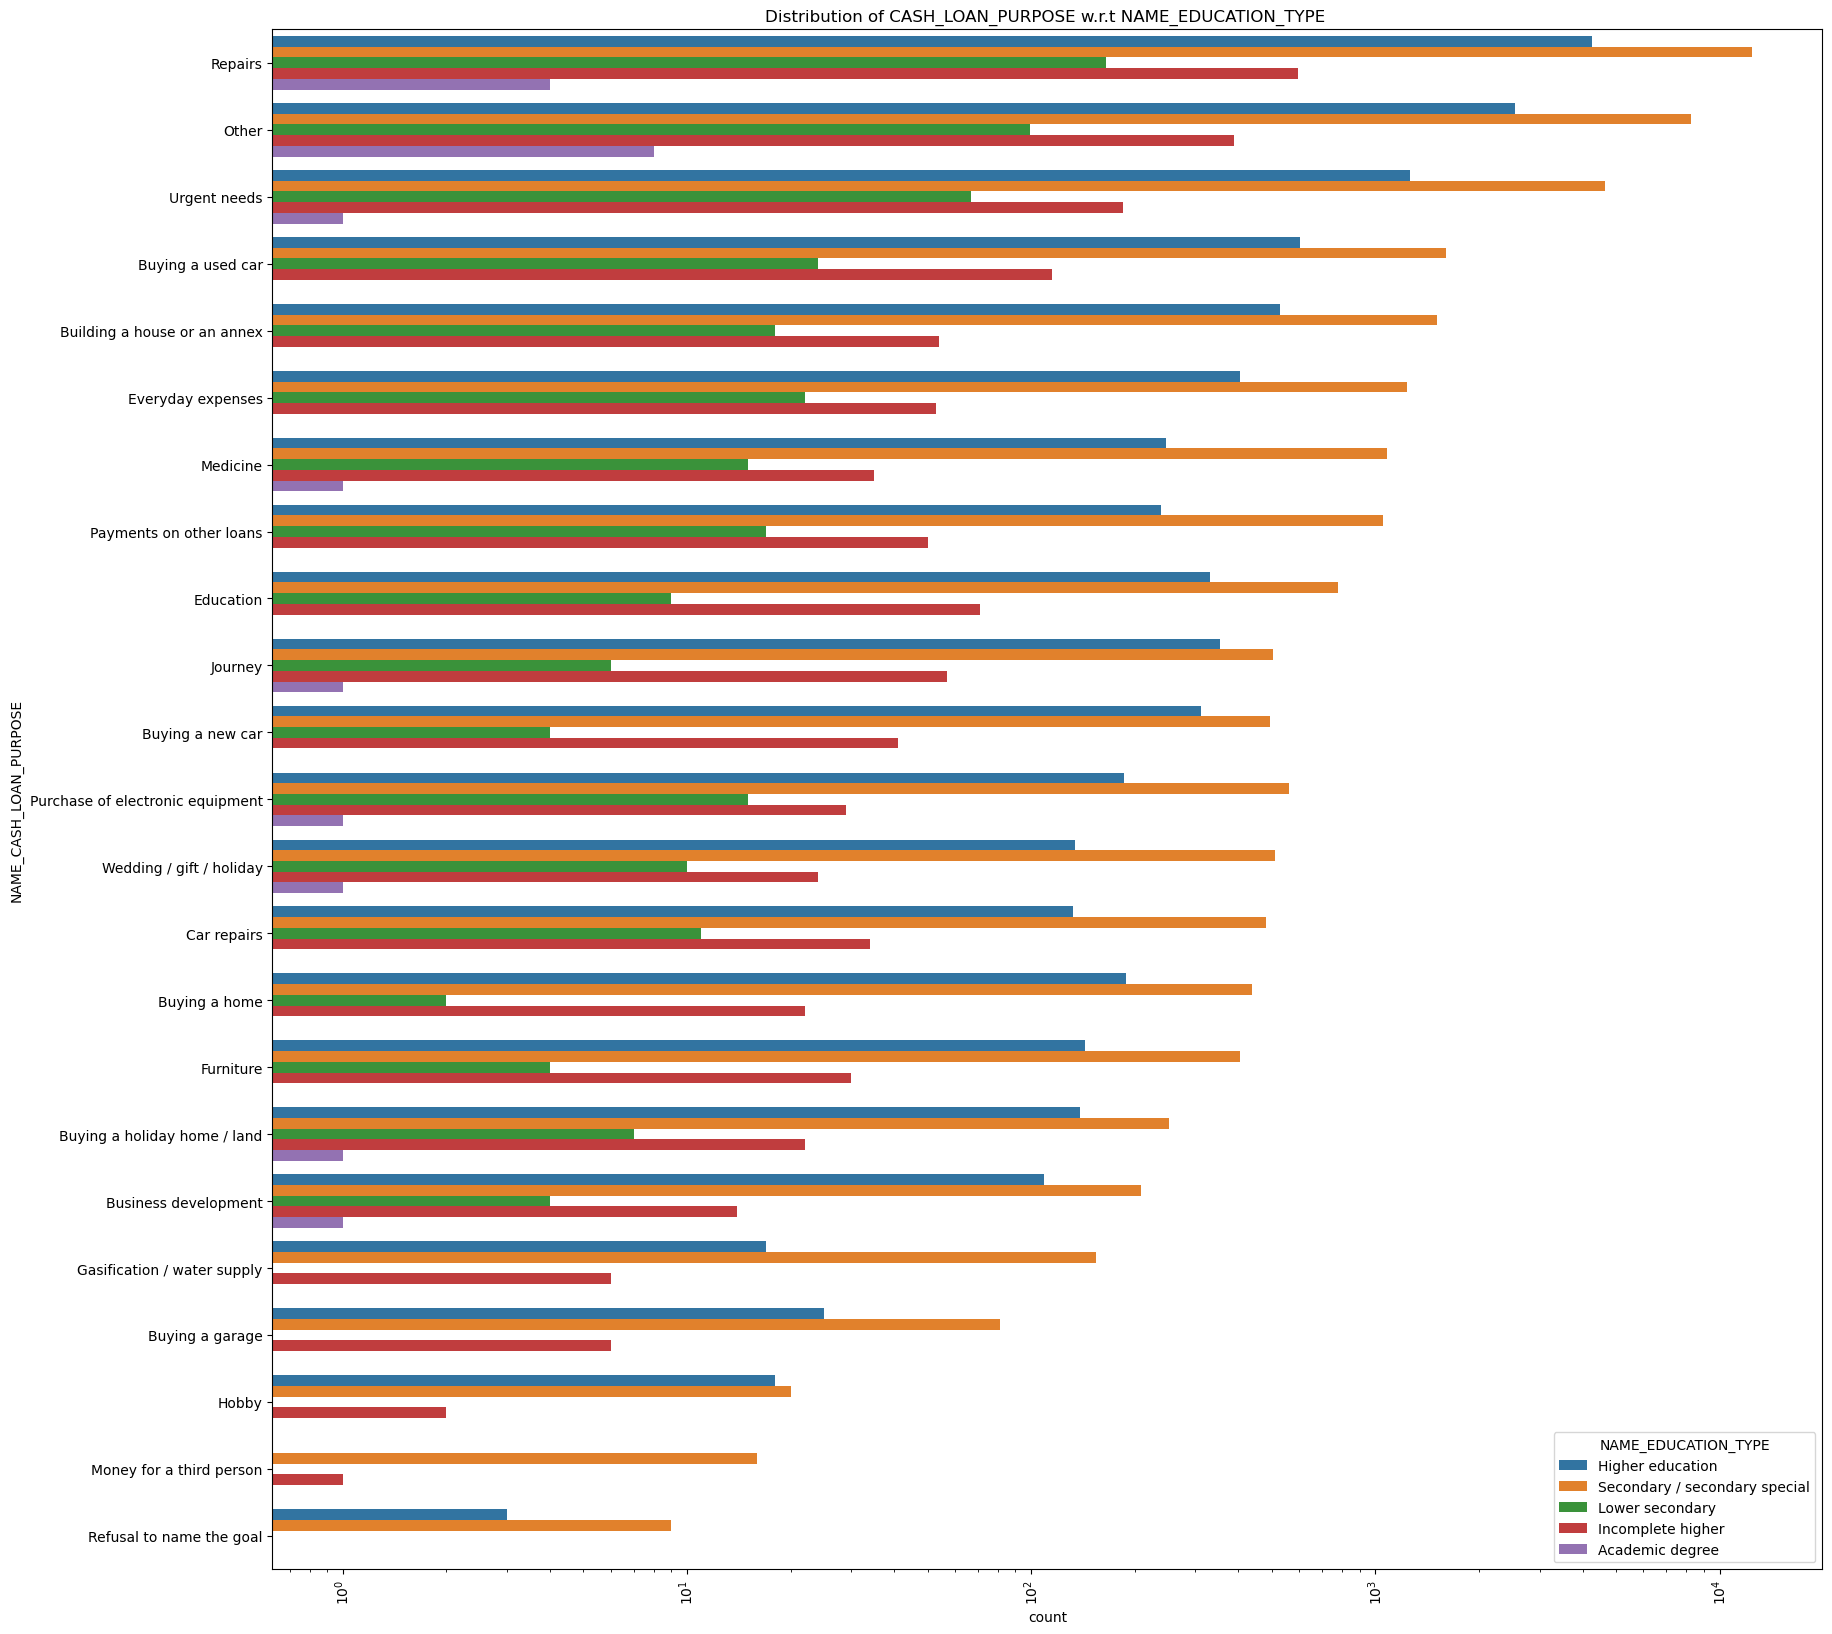

In [158]:
# Distribution of contract status across NAME_EDUCATION_TYPE

plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of CASH_LOAN_PURPOSE w.r.t NAME_EDUCATION_TYPE ')
sns.countplot(data = df, y='NAME_CASH_LOAN_PURPOSE', order=df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_EDUCATION_TYPE')
plt.show()

### Insight
1.Distribution of CASH_LOAN_PURPOSE w.r.t target: The loans were more credited for Repair purpose

2.Distribution of CASH_LOAN_PURPOSE w.r.t genders: The loans were more prefered to female clients

3.Distribution of CASH_LOAN_PURPOSE w.r.t CONTRACT_STATUS: 

a.   Repairs had all three categories

b.   Most approved loans were for Repairs and least for refusal

c.   Most refused loans were for Repairs and least for money for a third person.

d.  Most cancelled loans were for Repairs and least for money for refusal.

e.   Education loans were approved and cancelled at the same amount of count
   
4.Distribution of CASH_LOAN_PURPOSE w.r.t NAME_INCOME_TYPE: Working professionals should be preferred more than students & pensioners

5.Distribution of CASH_LOAN_PURPOSE w.r.t NAME_EDUCATION_TYPE:Higher education should be preferred more than Academic degree


## Remarks

1. Company should lend loans to clients by checking out mutiple parameters, to escape from loss from lending money to defaulters and not lending money to valid clients.
2. Female working clients can be given more preferences over Male as they tend to make loan payment on time.
3. According to given datasets, more loans were given for Repair Purpose, these category also falls on loan payment on time.
4. Clients who want loans for a third person , or refusal to name of the goal can be ignored or given loans with higher interest rates or less amount
5. Credit amount, goods price are related, where the higher the goods price, the credit amount also increases.
6. Working clients, with higher income, and higher education can be categorized as non defaulters.
7. Company should be very careful while lending loans , because if certain parameters favors Non- defaulters , they might also turn up to be defaulters, hence previous_application data should be cross verified before lending any old clients with loan. 
For new clients they can prefer either to increase the interest rate or reduce the loan amount.